# Stocks Prediction using Machine Learning

In [1]:
# import the required packages
import pandas as pd  

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

C:\Users\Samantha\AppData\Local\Temp\ipykernel_5456\1284445530.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. Data Pre-processing

### 1.1 Convert JSON to Dataframe

### 1.1.1 Netflix Price Data

In [2]:
df = pd.read_json('NetflixPriceData')

In [3]:
df

,Meta Data,Time Series (Daily)
1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
2. Symbol,NFLX,NaN
3. Last Refreshed,2024-01-23,NaN
4. Output Size,Full size,NaN
5. Time Zone,US/Eastern,NaN
...,...,...
2002-05-30,NaN,"{'1. open': '15.5100', '2. high': '15.5100', '..."
2002-05-29,NaN,"{'1. open': '16.3000', '2. high': '16.3000', '..."
2002-05-28,NaN,"{'1. open': '16.9900', '2. high': '17.2500', '..."
2002-05-24,NaN,"{'1. open': '17.0000', '2. high': '17.1500', '..."


In [4]:
# remove first 5 rows of data
df = df.iloc[5:]

In [5]:
df

,Meta Data,Time Series (Daily)
2024-01-23,NaN,"{'1. open': '492.0000', '2. high': '498.9600',..."
2024-01-22,NaN,"{'1. open': '487.5500', '2. high': '489.8000',..."
2024-01-19,NaN,"{'1. open': '484.9800', '2. high': '485.6700',..."
2024-01-18,NaN,"{'1. open': '480.0300', '2. high': '485.7700',..."
2024-01-17,NaN,"{'1. open': '484.5000', '2. high': '486.2100',..."
...,...,...
2002-05-30,NaN,"{'1. open': '15.5100', '2. high': '15.5100', '..."
2002-05-29,NaN,"{'1. open': '16.3000', '2. high': '16.3000', '..."
2002-05-28,NaN,"{'1. open': '16.9900', '2. high': '17.2500', '..."
2002-05-24,NaN,"{'1. open': '17.0000', '2. high': '17.1500', '..."


In [6]:
# remove 'meta data' column
df.drop('Meta Data', axis='columns', inplace=True)

In [7]:
df

,Time Series (Daily)
2024-01-23,"{'1. open': '492.0000', '2. high': '498.9600',..."
2024-01-22,"{'1. open': '487.5500', '2. high': '489.8000',..."
2024-01-19,"{'1. open': '484.9800', '2. high': '485.6700',..."
2024-01-18,"{'1. open': '480.0300', '2. high': '485.7700',..."
2024-01-17,"{'1. open': '484.5000', '2. high': '486.2100',..."
...,...
2002-05-30,"{'1. open': '15.5100', '2. high': '15.5100', '..."
2002-05-29,"{'1. open': '16.3000', '2. high': '16.3000', '..."
2002-05-28,"{'1. open': '16.9900', '2. high': '17.2500', '..."
2002-05-24,"{'1. open': '17.0000', '2. high': '17.1500', '..."


In [8]:
df['Time Series (Daily)']

2024-01-23    {'1. open': '492.0000', '2. high': '498.9600',...
2024-01-22    {'1. open': '487.5500', '2. high': '489.8000',...
2024-01-19    {'1. open': '484.9800', '2. high': '485.6700',...
2024-01-18    {'1. open': '480.0300', '2. high': '485.7700',...
2024-01-17    {'1. open': '484.5000', '2. high': '486.2100',...
                                    ...                        
2002-05-30    {'1. open': '15.5100', '2. high': '15.5100', '...
2002-05-29    {'1. open': '16.3000', '2. high': '16.3000', '...
2002-05-28    {'1. open': '16.9900', '2. high': '17.2500', '...
2002-05-24    {'1. open': '17.0000', '2. high': '17.1500', '...
2002-05-23    {'1. open': '16.1900', '2. high': '17.4000', '...
Name: Time Series (Daily), Length: 5454, dtype: object

In [9]:
column_names = ({
    'Date':[],
    'Open':[],
    'High':[],
    'Low':[],
    'Close':[],
    'Volume':[]
               })
df_new = pd.DataFrame(column_names)
df_new

,Date,Open,High,Low,Close,Volume


In [10]:
my_dict = df['Time Series (Daily)']
for date, record in my_dict.items():
    values = []
    values.append(date)
    for key, value in record.items():
        values.append(value)
    print(values)
    
    # Append each value into a new row
    df_new.loc[len(df_new)] = values

['2024-01-23', '492.0000', '498.9600', '481.4000', '492.1900', '15506024']
['2024-01-22', '487.5500', '489.8000', '479.9000', '485.7100', '5212309']
['2024-01-19', '484.9800', '485.6700', '476.0600', '482.9500', '5672351']
['2024-01-18', '480.0300', '485.7700', '478.0200', '485.3100', '4054399']
['2024-01-17', '484.5000', '486.2100', '475.2642', '480.3300', '4894593']
['2024-01-16', '490.0000', '494.1500', '478.0200', '481.2400', '4678974']
['2024-01-12', '500.5100', '500.7900', '490.6100', '492.1600', '5003718']
['2024-01-11', '492.5400', '503.4100', '483.8200', '492.2300', '7993265']
['2024-01-10', '481.6000', '487.0000', '472.9500', '478.3300', '4342448']
['2024-01-09', '475.5300', '485.0850', '473.8000', '482.0900', '3526757']
['2024-01-08', '473.8900', '485.2400', '473.6500', '485.0300', '3675775']
['2024-01-05', '476.5000', '479.5450', '471.8040', '474.0600', '2595449']
['2024-01-04', '472.9800', '480.7393', '466.5300', '474.6700', '3636513']
['2024-01-03', '467.3200', '475.0500'

['2023-07-12', '444.5500', '445.4085', '437.7494', '444.0500', '5731657']
['2023-07-11', '438.6500', '440.8000', '431.0415', '440.2100', '4574559']
['2023-07-10', '438.5200', '444.4100', '436.8200', '441.7100', '4251737']
['2023-07-07', '438.6000', '442.3250', '435.8354', '438.1000', '4165144']
['2023-07-06', '440.0000', '442.7999', '430.7200', '438.8400', '4944892']
['2023-07-05', '444.9100', '450.9700', '439.6244', '445.9000', '6875414']
['2023-07-03', '439.7600', '441.5450', '431.6200', '441.4400', '3733207']
['2023-06-30', '431.1000', '444.1200', '431.1000', '440.4900', '7346394']
['2023-06-29', '434.3300', '437.8500', '426.1500', '428.2400', '4932310']
['2023-06-28', '423.1000', '437.2915', '422.8900', '429.8400', '8811342']
['2023-06-27', '417.3900', '420.8789', '411.5000', '417.0800', '4818066']
['2023-06-26', '422.4350', '430.9599', '414.9000', '415.9400', '4640022']
['2023-06-23', '418.5900', '425.8200', '417.7300', '424.0200', '8298600']
['2023-06-22', '422.9300', '424.7100',

['2022-08-10', '236.9900', '244.5400', '236.5958', '244.1100', '9254760']
['2022-08-09', '231.6200', '232.1999', '224.6500', '229.9400', '6181194']
['2022-08-08', '227.4900', '241.9599', '226.4100', '233.4900', '10997409']
['2022-08-05', '225.3000', '228.6200', '222.8700', '226.7800', '5539733']
['2022-08-04', '227.6800', '232.0700', '225.0500', '229.9100', '7142741']
['2022-08-03', '224.7900', '228.1000', '222.4200', '226.7300', '6400701']
['2022-08-02', '222.7600', '228.2000', '220.8800', '221.4200', '6361327']
['2022-08-01', '223.0950', '228.3900', '221.0000', '226.2100', '5525044']
['2022-07-29', '223.2900', '230.7500', '222.4000', '224.9000', '9064937']
['2022-07-28', '224.6000', '228.1000', '219.6700', '226.0200', '8972738']
['2022-07-27', '216.4800', '227.7800', '214.5800', '226.7500', '10508385']
['2022-07-26', '216.6600', '219.3900', '211.6400', '213.9100', '9508532']
['2022-07-25', '221.3100', '225.2300', '216.3500', '218.5100', '10935247']
['2022-07-22', '222.3800', '229.350

['2022-02-28', '387.3300', '397.7500', '382.1300', '394.5200', '5035046']
['2022-02-25', '386.6100', '391.2900', '375.5800', '390.8000', '4841636']
['2022-02-24', '355.0900', '390.7300', '354.7200', '390.0300', '7068724']
['2022-02-23', '382.7200', '386.0000', '366.6600', '367.4600', '4614290']
['2022-02-22', '388.9500', '392.4200', '373.0200', '377.3800', '6664974']
['2022-02-18', '392.5300', '402.8700', '389.0466', '391.2900', '6801668']
['2022-02-17', '394.2350', '399.1100', '385.7000', '386.6700', '4669222']
['2022-02-16', '401.5300', '401.5600', '390.3842', '398.0800', '5277650']
['2022-02-15', '403.7900', '409.1619', '401.0100', '407.4600', '5395641']
['2022-02-14', '387.5900', '409.3600', '386.8910', '396.5700', '7202155']
['2022-02-11', '405.3300', '411.6103', '387.6500', '391.3100', '7558939']
['2022-02-10', '402.1000', '408.0000', '396.3600', '406.2700', '8452915']
['2022-02-09', '408.6500', '412.9800', '398.7900', '412.8900', '7738227']
['2022-02-08', '398.1800', '406.6100',

['2021-08-03', '514.3900', '515.6300', '505.3700', '510.8200', '2579427']
['2021-08-02', '519.0000', '519.8500', '510.5100', '515.1500', '2096632']
['2021-07-30', '512.6900', '519.7900', '510.9642', '517.5700', '2537107']
['2021-07-29', '519.9600', '520.7799', '513.7927', '514.2500', '1704378']
['2021-07-28', '521.8200', '524.4700', '516.9800', '519.3000', '2390466']
['2021-07-27', '518.0800', '521.9500', '512.0500', '518.9100', '2759037']
['2021-07-26', '514.3800', '521.1300', '509.0101', '516.4900', '2254538']
['2021-07-23', '512.1600', '517.4100', '504.6600', '515.4100', '3820478']
['2021-07-22', '510.2059', '513.6800', '507.0000', '511.7700', '4328061']
['2021-07-21', '526.1300', '530.9900', '505.6100', '513.6300', '11906793']
['2021-07-20', '526.0700', '536.6400', '520.3000', '531.0500', '6930440']
['2021-07-19', '526.0500', '534.9130', '522.2401', '532.2800', '3885764']
['2021-07-16', '541.8100', '544.0600', '527.0500', '530.3100', '3442101']
['2021-07-15', '553.9700', '557.5399'

['2020-11-18', '481.9500', '488.6100', '477.7212', '481.7900', '3629237']
['2020-11-17', '480.1200', '487.5100', '478.8525', '480.6300', '3698082']
['2020-11-16', '480.0000', '485.5800', '477.3000', '479.1000', '3953563']
['2020-11-13', '486.7700', '488.9400', '477.8000', '482.8400', '3006510']
['2020-11-12', '491.0000', '496.5200', '480.4255', '486.7700', '5071155']
['2020-11-11', '483.0000', '491.6800', '478.2600', '490.7600', '5460532']
['2020-11-10', '470.9500', '484.6000', '463.4100', '480.2400', '8306142']
['2020-11-09', '485.5400', '495.8500', '467.2600', '470.5000', '10419676']
['2020-11-06', '515.0000', '515.2100', '502.5100', '514.7300', '4236349']
['2020-11-05', '506.5600', '518.7337', '503.4500', '513.7600', '5372781']
['2020-11-04', '495.3600', '507.7300', '493.9800', '496.9500', '5137330']
['2020-11-03', '484.9300', '495.3050', '478.7600', '487.2200', '3690213']
['2020-11-02', '478.8700', '486.3000', '475.0000', '484.1200', '4408193']
['2020-10-30', '502.0100', '505.8800'

['2020-03-23', '347.8900', '366.1100', '340.8838', '360.2700', '13449378']
['2020-03-20', '342.3100', '350.4900', '332.0000', '332.8300', '10853846']
['2020-03-19', '324.3300', '348.5100', '316.8200', '332.0300', '10615957']
['2020-03-18', '302.3950', '331.5794', '300.0000', '315.4700', '12560908']
['2020-03-17', '306.1800', '322.9000', '290.2500', '319.7500', '10013913']
['2020-03-16', '306.6300', '334.3500', '294.7500', '298.8400', '10559940']
['2020-03-13', '330.5100', '336.4200', '307.3900', '336.2950', '9458197']
['2020-03-12', '326.5000', '335.7200', '307.3200', '315.2500', '12071591']
['2020-03-11', '358.9200', '362.9800', '344.7900', '349.9200', '6058782']
['2020-03-10', '356.4250', '364.5400', '347.8500', '364.1300', '7604444']
['2020-03-09', '343.8600', '357.4700', '341.7209', '346.4900', '7405458']
['2020-03-06', '367.7000', '371.3100', '356.8500', '368.9700', '8147165']
['2020-03-05', '381.0000', '391.4000', '368.6401', '372.7800', '8746985']
['2020-03-04', '377.7700', '384

['2019-09-19', '291.5600', '293.8100', '283.4000', '286.6000', '8545761']
['2019-09-18', '294.9900', '296.0500', '287.4500', '291.5600', '7841539']
['2019-09-17', '294.5000', '299.1500', '291.7900', '298.6000', '4817119']
['2019-09-16', '294.2300', '297.4300', '289.7800', '294.2900', '5307386']
['2019-09-13', '290.6100', '296.6200', '290.0400', '294.1500', '6583124']
['2019-09-12', '288.1000', '292.7300', '286.6000', '288.8600', '5010927']
['2019-09-11', '285.7000', '292.6500', '284.6100', '288.2700', '7405949']
['2019-09-10', '291.1600', '297.1700', '282.6629', '287.9900', '12320248']
['2019-09-09', '294.8100', '301.5500', '290.6000', '294.3400', '8232744']
['2019-09-06', '293.3500', '293.3500', '287.0300', '290.1700', '5166556']
['2019-09-05', '285.3200', '293.9700', '282.7850', '293.2500', '8972356']
['2019-09-04', '291.2500', '292.3800', '286.5100', '291.5200', '4653665']
['2019-09-03', '290.8200', '293.9000', '288.0600', '289.2900', '3684177']
['2019-08-30', '298.7800', '298.9400'

['2019-02-13', '357.3000', '359.6000', '350.2800', '351.7700', '10559146']
['2019-02-12', '348.0900', '360.0000', '346.5200', '359.9700', '10429399']
['2019-02-11', '350.0000', '352.8700', '344.8100', '345.7300', '5454863']
['2019-02-08', '338.0000', '348.0000', '338.0000', '347.5700', '7561391']
['2019-02-07', '347.9000', '348.7500', '339.0200', '344.7100', '7864529']
['2019-02-06', '357.0000', '357.0400', '347.1900', '352.1900', '6717662']
['2019-02-05', '353.2000', '360.0000', '352.9000', '355.8100', '9046623']
['2019-02-04', '342.6000', '352.0000', '341.3000', '351.3400', '9051387']
['2019-02-01', '337.1800', '346.8400', '336.5000', '339.8500', '9827760']
['2019-01-31', '339.6800', '345.9900', '338.0919', '339.5000', '8535517']
['2019-01-30', '332.7500', '341.7800', '330.8000', '340.6600', '9234530']
['2019-01-29', '335.8700', '338.2200', '328.1510', '328.9000', '7655189']
['2019-01-28', '334.7000', '336.3000', '328.8800', '335.6600', '8652082']
['2019-01-25', '328.7200', '340.0000

['2018-08-13', '339.8900', '347.1900', '339.0700', '341.3100', '6893649']
['2018-08-10', '346.9100', '349.1000', '344.4233', '345.8700', '4337481']
['2018-08-09', '347.9600', '352.4390', '345.8157', '349.3600', '4820313']
['2018-08-08', '352.2100', '352.2900', '346.6100', '347.6100', '5402465']
['2018-08-07', '353.2300', '357.3100', '349.0100', '351.8300', '7970930']
['2018-08-06', '342.8653', '351.9800', '341.7400', '350.9200', '8198076']
['2018-08-03', '347.7500', '347.8600', '338.4768', '343.0900', '8848367']
['2018-08-02', '337.2300', '345.0000', '334.7100', '344.5000', '7131328']
['2018-08-01', '335.8700', '344.4100', '334.0200', '338.3800', '7790477']
['2018-07-31', '331.5100', '342.5000', '328.0000', '337.4500', '14085369']
['2018-07-30', '351.9300', '352.0300', '334.0201', '334.9600', '18260710']
['2018-07-27', '366.8500', '367.0000', '351.6500', '355.2100', '8949491']
['2018-07-26', '358.1900', '365.5400', '356.6250', '363.0900', '6993684']
['2018-07-25', '357.5700', '363.2800

['2018-02-23', '281.0000', '286.0000', '277.8100', '285.9300', '7224968']
['2018-02-22', '283.8800', '284.5000', '274.4500', '278.1400', '8769251']
['2018-02-21', '282.0700', '286.6400', '280.0100', '281.0400', '9289130']
['2018-02-20', '277.7400', '285.8120', '276.6100', '278.5500', '7691297']
['2018-02-16', '278.7300', '281.9600', '275.6900', '278.5200', '8223309']
['2018-02-15', '270.0300', '280.5000', '267.6300', '280.2700', '10661768']
['2018-02-14', '260.4700', '269.8800', '260.3300', '266.0000', '10819780']
['2018-02-13', '257.2900', '261.4100', '254.7000', '258.2700', '6758332']
['2018-02-12', '252.1400', '259.1500', '249.0000', '257.9500', '8453411']
['2018-02-09', '253.8500', '255.7999', '236.1100', '249.4700', '16282837']
['2018-02-08', '267.0800', '267.6200', '250.0000', '250.1000', '8711249']
['2018-02-07', '266.5800', '272.4500', '264.3250', '264.5600', '8679872']
['2018-02-06', '247.7000', '266.7000', '245.0000', '265.7200', '12285458']
['2018-02-05', '262.0000', '267.89

['2017-03-17', '144.0500', '145.7600', '143.4000', '145.1100', '6281316']
['2017-03-16', '145.5000', '146.5000', '144.2200', '144.3900', '5286456']
['2017-03-15', '144.2000', '145.5200', '143.2300', '145.2500', '5987198']
['2017-03-14', '142.9500', '143.3100', '141.7000', '143.1900', '4660294']
['2017-03-13', '140.9000', '143.7100', '140.3200', '143.5200', '4922432']
['2017-03-10', '141.3900', '141.8000', '140.2800', '140.8900', '3318464']
['2017-03-09', '140.0400', '141.2400', '139.7400', '140.5300', '2652740']
['2017-03-08', '141.4700', '142.0600', '139.7700', '140.3200', '4092550']
['2017-03-07', '141.9900', '142.4000', '140.3800', '141.4300', '4241037']
['2017-03-06', '141.0000', '142.8400', '140.5400', '141.9400', '7116118']
['2017-03-03', '139.6900', '140.9100', '138.2600', '139.1400', '5401104']
['2017-03-02', '142.1500', '142.7000', '139.0900', '139.5300', '6119945']
['2017-03-01', '142.8400', '143.2600', '142.1000', '142.6500', '41706']
['2017-02-28', '143.3000', '143.5700', '

['2016-09-14', '97.3500', '98.3500', '96.9600', '97.0100', '8528450']
['2016-09-13', '97.1700', '98.0000', '95.3300', '96.0900', '11788078']
['2016-09-12', '95.9100', '99.2900', '95.7100', '99.0500', '7718351']
['2016-09-09', '99.0600', '99.3900', '96.5000', '96.5000', '7373319']
['2016-09-08', '99.2300', '100.0500', '98.8200', '99.6600', '5201208']
['2016-09-07', '100.1100', '100.1900', '98.4200', '99.1500', '6468512']
['2016-09-06', '97.7600', '100.3200', '97.6490', '100.0900', '9036092']
['2016-09-02', '97.9000', '98.1800', '97.0100', '97.3800', '4247182']
['2016-09-01', '97.8100', '97.9800', '96.9160', '97.3800', '4148621']
['2016-08-31', '97.4800', '97.8800', '96.7600', '97.4500', '4690614']
['2016-08-30', '97.8400', '98.8500', '97.1400', '97.4500', '6093536']
['2016-08-29', '96.9700', '98.4497', '96.5700', '97.3000', '8008430']
['2016-08-26', '97.3300', '97.9500', '96.5700', '97.5800', '6617636']
['2016-08-25', '96.3800', '98.2450', '96.0400', '97.3200', '10823055']
['2016-08-24'

['2015-09-01', '109.3600', '111.2400', '103.8200', '105.7900', '35977081']
['2015-08-31', '115.2400', '117.0000', '113.7600', '115.0300', '17005581']
['2015-08-28', '116.4600', '119.3500', '115.8800', '117.6300', '20240237']
['2015-08-27', '114.9400', '118.2500', '113.0200', '117.6600', '37056071']
['2015-08-26', '107.1500', '110.2800', '102.0200', '110.1300', '36164638']
['2015-08-25', '107.7500', '107.8800', '101.5000', '101.5200', '37620719']
['2015-08-24', '88.7500', '109.6300', '85.5000', '96.8800', '59951948']
['2015-08-21', '106.2000', '110.0000', '102.7510', '103.9600', '33228296']
['2015-08-20', '119.8000', '121.4500', '111.3400', '112.4900', '28045318']
['2015-08-19', '123.5000', '123.7000', '121.5000', '122.0600', '10115271']
['2015-08-18', '125.2600', '126.7490', '123.5500', '124.0500', '9381994']
['2015-08-17', '123.1400', '125.7000', '122.5900', '125.3600', '9233848']
['2015-08-14', '124.9600', '125.0000', '123.0000', '123.3900', '8667683']
['2015-08-13', '120.9900', '125

['2014-08-15', '451.4900', '462.0000', '448.6000', '459.0900', '3148100']
['2014-08-14', '452.2100', '455.0000', '448.2200', '450.8700', '953800']
['2014-08-13', '448.6000', '454.2150', '446.8200', '451.5300', '1294700']
['2014-08-12', '451.3500', '453.0000', '443.4100', '446.4100', '1549300']
['2014-08-11', '449.2200', '457.6500', '448.7100', '451.5400', '1892400']
['2014-08-08', '450.2000', '450.9700', '442.0500', '445.8500', '2213600']
['2014-08-07', '435.3000', '449.9499', '434.5500', '449.6700', '3901900']
['2014-08-06', '421.0000', '434.9000', '420.5500', '430.3000', '2262200']
['2014-08-05', '421.3000', '428.0000', '420.3100', '422.8500', '1521900']
['2014-08-04', '427.2000', '430.0000', '420.7800', '422.7000', '1526700']
['2014-08-01', '421.7600', '427.7264', '412.5100', '425.4000', '2706800']
['2014-07-31', '430.2600', '432.9700', '421.2900', '422.7200', '1974300']
['2014-07-30', '424.7500', '435.2899', '424.3100', '434.3600', '2180500']
['2014-07-29', '423.2100', '428.3900', 

['2014-01-06', '363.2300', '364.3100', '353.3300', '359.5700', '2214500']
['2014-01-03', '364.0000', '367.4694', '362.9000', '363.1000', '1545300']
['2014-01-02', '366.8100', '367.5800', '360.8000', '362.8200', '1760800']
['2013-12-31', '365.5000', '369.1500', '363.6300', '368.1700', '1502400']
['2013-12-30', '367.6200', '369.5400', '359.0400', '366.9900', '2153600']
['2013-12-27', '377.1100', '378.7500', '365.8100', '367.5000', '2421200']
['2013-12-26', '378.1100', '380.9100', '375.8340', '376.9300', '1752700']
['2013-12-24', '380.7600', '383.9600', '377.4800', '378.3900', '796800']
['2013-12-23', '378.6900', '383.4300', '376.6310', '380.5800', '1803500']
['2013-12-20', '376.5000', '379.6900', '374.3400', '375.6700', '2688200']
['2013-12-19', '374.2000', '379.8600', '373.3500', '376.7400', '1978500']
['2013-12-18', '373.8600', '377.0000', '366.5100', '376.2400', '2840200']
['2013-12-17', '366.7500', '377.7000', '366.2700', '374.8700', '2635500']
['2013-12-16', '369.9800', '371.0000', 

['2013-05-29', '214.5500', '221.3799', '209.9100', '215.3400', '4871700']
['2013-05-28', '231.7500', '235.9600', '212.9750', '214.1900', '5646500']
['2013-05-24', '225.2300', '229.0000', '224.5000', '228.7400', '1686900']
['2013-05-23', '225.7000', '228.2000', '221.5500', '226.1800', '2314000']
['2013-05-22', '234.4000', '238.2000', '226.6401', '228.5600', '3109900']
['2013-05-21', '240.0400', '240.9000', '235.0000', '237.0900', '1641600']
['2013-05-20', '238.4400', '241.6500', '236.7600', '239.5500', '2109400']
['2013-05-17', '238.5300', '242.7500', '236.0000', '239.0000', '2877300']
['2013-05-16', '246.9500', '248.8500', '235.2000', '237.0300', '4007600']
['2013-05-15', '239.4700', '245.4300', '237.8300', '243.4000', '5147100']
['2013-05-14', '231.9900', '236.5900', '230.8000', '233.9700', '5505100']
['2013-05-13', '217.1700', '229.6900', '217.1400', '229.3790', '5908200']
['2013-05-10', '216.4100', '219.7500', '214.5601', '217.6940', '2692100']
['2013-05-09', '208.0300', '218.8800',

['2012-11-05', '74.5750', '78.9400', '74.5000', '78.2400', '4145200']
['2012-11-02', '77.2500', '79.8500', '75.9700', '76.9000', '4235800']
['2012-11-01', '77.8500', '79.6900', '74.6500', '77.6900', '8952800']
['2012-10-31', '66.4100', '84.9500', '65.5500', '79.2394', '15329800']
['2012-10-26', '61.5500', '70.2400', '60.4900', '69.5800', '14776200']
['2012-10-25', '60.0500', '61.6650', '59.9000', '61.5100', '4720900']
['2012-10-24', '57.8550', '61.0000', '57.4000', '60.1177', '14294300']
['2012-10-23', '67.3000', '69.1500', '66.0600', '68.2200', '9071200']
['2012-10-22', '64.3600', '69.7292', '64.2912', '67.8800', '6525500']
['2012-10-19', '67.1900', '67.5000', '64.2600', '64.9800', '3268800']
['2012-10-18', '68.4900', '69.8400', '66.9500', '67.3600', '3828200']
['2012-10-17', '66.0100', '68.8200', '65.6400', '68.5200', '3780600']
['2012-10-16', '64.9000', '66.2100', '63.7600', '66.0500', '4186000']
['2012-10-15', '65.1500', '65.1800', '63.4000', '64.7600', '2963600']
['2012-10-12', '6

['2011-11-03', '84.1300', '92.6000', '81.8000', '92.2900', '13526500']
['2011-11-02', '80.7080', '84.4000', '80.1100', '83.3900', '5912000']
['2011-11-01', '80.1099', '81.0000', '78.7400', '80.0900', '4716600']
['2011-10-31', '83.6400', '84.0900', '81.4500', '82.0800', '5664800']
['2011-10-28', '80.2800', '84.6600', '79.6000', '84.1400', '8252800']
['2011-10-27', '82.1800', '82.7200', '79.2500', '80.8600', '10170000']
['2011-10-26', '78.7300', '81.4200', '75.4000', '79.4000', '21247700']
['2011-10-25', '74.9000', '79.3900', '74.2500', '77.3700', '45077400']
['2011-10-24', '119.1000', '120.2800', '115.1000', '118.8400', '17208600']
['2011-10-21', '113.6900', '117.1290', '110.9400', '117.0400', '6274800']
['2011-10-20', '110.0500', '111.9900', '109.0810', '111.4800', '3654000']
['2011-10-19', '110.6600', '114.0900', '105.5900', '109.4200', '8636700']
['2011-10-18', '117.2500', '117.4900', '110.5800', '111.7400', '6002300']
['2011-10-17', '115.9100', '119.2500', '115.2300', '117.3300', '5

['2011-01-26', '187.4000', '187.5890', '181.8300', '183.0300', '8548800']
['2011-01-25', '182.9900', '186.8500', '181.5615', '186.7400', '3066300']
['2011-01-24', '179.9900', '184.4200', '176.0700', '183.9600', '3853100']
['2011-01-21', '184.8600', '185.5800', '181.6900', '182.0900', '3558300']
['2011-01-20', '186.8200', '188.2300', '181.3000', '185.0000', '5461600']
['2011-01-19', '192.8100', '193.8500', '189.0201', '190.8700', '3105800']
['2011-01-18', '191.4700', '194.8400', '189.5700', '193.6800', '2654400']
['2011-01-14', '190.8100', '193.2500', '188.7900', '191.4800', '2796500']
['2011-01-13', '188.4400', '192.3520', '187.0010', '191.4900', '4271900']
['2011-01-12', '188.0100', '189.0000', '184.7500', '188.9000', '3014100']
['2011-01-11', '189.4177', '191.3000', '185.7700', '186.6500', '4646100']
['2011-01-10', '179.7000', '187.9500', '179.1800', '187.8800', '6239200']
['2011-01-07', '178.6700', '180.5500', '176.3800', '179.3000', '3165000']
['2011-01-06', '176.1800', '179.6900',

['2010-07-23', '104.9800', '108.7500', '102.2100', '107.7000', '4786800']
['2010-07-22', '109.5000', '112.4700', '101.7500', '103.5600', '13659700']
['2010-07-21', '122.0500', '123.6000', '118.8800', '119.6500', '4722200']
['2010-07-20', '117.1500', '120.9000', '114.5500', '120.3900', '2517700']
['2010-07-19', '117.7700', '120.1300', '115.1500', '118.9000', '1891300']
['2010-07-16', '120.7000', '120.9799', '117.7500', '118.3900', '2067600']
['2010-07-15', '121.6700', '122.2500', '119.2400', '121.1100', '2185100']
['2010-07-14', '120.5200', '124.0000', '119.1000', '123.0000', '1949100']
['2010-07-13', '121.4200', '121.7100', '117.8500', '120.9200', '2511600']
['2010-07-12', '117.9500', '120.5000', '117.1001', '119.3800', '1915800']
['2010-07-09', '116.1800', '117.8400', '114.2800', '117.5340', '1818000']
['2010-07-08', '120.0200', '122.7500', '115.1900', '116.9800', '3754700']
['2010-07-07', '108.8200', '118.5000', '107.2800', '118.4900', '4069100']
['2010-07-06', '109.4000', '111.4100'

['2010-01-26', '48.7200', '50.2500', '48.5600', '49.9500', '1620500']
['2010-01-25', '51.0500', '51.4986', '48.5200', '49.1300', '1970200']
['2010-01-22', '51.0800', '52.3900', '50.5000', '50.8900', '1342200']
['2010-01-21', '50.5200', '52.1800', '50.5000', '51.1900', '1230700']
['2010-01-20', '50.8600', '52.4500', '50.5500', '51.2400', '1383600']
['2010-01-19', '50.7500', '51.6800', '50.7000', '51.2000', '757500']
['2010-01-15', '50.7200', '51.8500', '50.6300', '50.9500', '1861600']
['2010-01-14', '52.6300', '53.0300', '50.8900', '50.9900', '2526500']
['2010-01-13', '53.2900', '54.2800', '52.9100', '53.9600', '2060300']
['2010-01-12', '52.7000', '53.0800', '52.1600', '52.3700', '904300']
['2010-01-11', '53.6200', '53.9300', '52.7000', '53.2300', '969100']
['2010-01-08', '52.4900', '54.2000', '52.2600', '53.3000', '1168700']
['2010-01-07', '54.1200', '54.3000', '52.2406', '52.4000', '1422200']
['2010-01-06', '51.5300', '53.7100', '50.3800', '53.3200', '3327200']
['2010-01-05', '53.5700

['2009-04-02', '43.7700', '43.9300', '42.9900', '43.1300', '1578400']
['2009-04-01', '42.7800', '43.9800', '42.1200', '42.8700', '1489700']
['2009-03-31', '42.2100', '43.9700', '41.6700', '42.9200', '1816900']
['2009-03-30', '39.5100', '42.3400', '39.0500', '42.0300', '2770900']
['2009-03-27', '41.2400', '41.2400', '39.4100', '39.6800', '1576500']
['2009-03-26', '41.7100', '42.3820', '41.3900', '41.7500', '2065700']
['2009-03-25', '43.2300', '43.8000', '40.4000', '41.5600', '2669500']
['2009-03-24', '43.0200', '44.4200', '42.9500', '43.4400', '1743600']
['2009-03-23', '41.6500', '43.4000', '40.6000', '43.4000', '2091400']
['2009-03-20', '41.8100', '42.2600', '40.7400', '41.6500', '1873900']
['2009-03-19', '42.4500', '42.4500', '41.2401', '41.5100', '1730800']
['2009-03-18', '40.7000', '42.4500', '40.1500', '41.6200', '2336500']
['2009-03-17', '38.7500', '40.7900', '38.1100', '40.7900', '1700500']
['2009-03-16', '39.6800', '40.3500', '38.5775', '38.6600', '1717700']
['2009-03-13', '39.9

['2008-09-08', '30.1700', '30.8100', '29.5900', '30.1500', '1591800']
['2008-09-05', '29.4400', '29.8300', '28.5300', '29.6600', '1560500']
['2008-09-04', '30.6400', '31.3000', '29.6450', '29.8700', '1885000']
['2008-09-03', '31.0800', '31.7100', '30.6600', '30.9100', '772800']
['2008-09-02', '31.1700', '32.0000', '30.5300', '30.8400', '1276900']
['2008-08-29', '31.1400', '31.4400', '30.5500', '30.8400', '619100']
['2008-08-28', '30.3400', '31.4800', '30.3400', '31.1200', '1239400']
['2008-08-27', '29.9100', '31.0000', '29.8800', '30.6400', '898900']
['2008-08-26', '29.9200', '30.5000', '29.8350', '30.0900', '1466100']
['2008-08-25', '30.4400', '30.6300', '29.8700', '29.9400', '815700']
['2008-08-22', '30.1000', '30.7800', '30.0200', '30.6500', '763500']
['2008-08-21', '29.9500', '30.4400', '29.9000', '30.0000', '769600']
['2008-08-20', '30.1600', '30.6900', '29.9100', '30.5200', '729600']
['2008-08-19', '30.4300', '30.6400', '29.9100', '30.1100', '862400']
['2008-08-18', '31.3300', '3

['2007-10-23', '25.7850', '26.2000', '24.5210', '25.9900', '5497900']
['2007-10-22', '22.7500', '23.2700', '22.1000', '23.0100', '3045000']
['2007-10-19', '24.2900', '24.2900', '22.6000', '23.2400', '1599300']
['2007-10-18', '23.9100', '24.3000', '23.6600', '24.0300', '1132800']
['2007-10-17', '23.8000', '24.3000', '23.6400', '24.2800', '607100']
['2007-10-16', '24.2500', '24.2500', '23.6500', '23.9700', '900000']
['2007-10-15', '23.9000', '24.5000', '23.5900', '23.9600', '1647600']
['2007-10-12', '22.8500', '23.3400', '22.7900', '23.0000', '604400']
['2007-10-11', '23.4100', '24.0200', '22.6300', '22.9100', '1429700']
['2007-10-10', '22.6700', '23.6700', '22.5300', '23.4200', '1504900']
['2007-10-09', '22.2500', '23.0000', '22.1700', '22.7900', '1223300']
['2007-10-08', '21.7700', '22.3200', '21.6000', '22.2700', '457900']
['2007-10-05', '21.2300', '22.2200', '21.2000', '22.0000', '935600']
['2007-10-04', '20.8800', '21.2700', '20.7700', '21.1400', '699700']
['2007-10-03', '21.0200', 

['2006-11-22', '29.3600', '29.7200', '29.1700', '29.5900', '420300']
['2006-11-21', '29.2500', '29.4000', '29.0000', '29.2700', '431600']
['2006-11-20', '28.9200', '29.3800', '28.8000', '29.0800', '415500']
['2006-11-17', '29.2700', '29.2700', '28.8500', '28.9200', '509600']
['2006-11-16', '29.7000', '29.7500', '29.1300', '29.2700', '631700']
['2006-11-15', '29.0100', '29.8200', '28.8400', '29.7500', '1185200']
['2006-11-14', '29.6600', '29.6700', '28.9200', '29.0900', '882400']
['2006-11-13', '29.5400', '29.9880', '29.3100', '29.4900', '675300']
['2006-11-10', '29.0600', '29.5200', '28.9400', '29.3800', '1100300']
['2006-11-09', '28.8300', '29.5000', '28.7700', '28.9200', '2052000']
['2006-11-08', '27.5500', '28.9700', '27.3500', '28.8800', '2234500']
['2006-11-07', '26.9500', '27.8400', '26.8826', '27.6400', '1275900']
['2006-11-06', '26.8000', '27.3000', '26.7500', '27.2600', '951300']
['2006-11-03', '26.7400', '27.4200', '26.2000', '26.7000', '1253000']
['2006-11-02', '27.2300', '2

['2006-04-17', '29.0000', '29.2000', '28.7500', '29.2000', '768800']
['2006-04-13', '28.5800', '29.2600', '28.5500', '29.1900', '725200']
['2006-04-12', '28.6700', '29.0900', '28.3500', '28.7200', '979900']
['2006-04-11', '28.4000', '28.6200', '27.8400', '28.5200', '1178800']
['2006-04-10', '27.9000', '28.6200', '27.7600', '28.2500', '737900']
['2006-04-07', '28.2500', '29.1200', '27.6600', '27.9400', '710400']
['2006-04-06', '28.5800', '28.6200', '27.9500', '28.2500', '918900']
['2006-04-05', '26.9500', '28.9000', '26.8700', '28.6600', '2012300']
['2006-04-04', '28.0500', '28.1500', '27.2600', '27.4100', '1712300']
['2006-04-03', '28.9900', '29.0400', '27.9800', '28.1300', '1217400']
['2006-03-31', '28.5000', '29.1100', '28.5000', '28.9900', '559300']
['2006-03-30', '29.1100', '29.3500', '28.1100', '28.6400', '928500']
['2006-03-29', '28.1300', '29.4000', '27.9500', '29.2100', '1139800']
['2006-03-28', '28.9900', '29.0000', '27.5500', '28.0300', '1201100']
['2006-03-27', '28.3900', '2

['2005-06-10', '15.6500', '17.0900', '15.5000', '16.9100', '2807400']
['2005-06-09', '15.0500', '15.6700', '14.6500', '15.6500', '1149000']
['2005-06-08', '15.0600', '15.1500', '14.7500', '14.8600', '528800']
['2005-06-07', '15.3000', '15.6800', '14.9000', '15.0000', '1093900']
['2005-06-06', '14.5500', '15.3000', '14.4000', '15.2200', '925300']
['2005-06-03', '15.0500', '15.1400', '14.5500', '14.6700', '997300']
['2005-06-02', '14.4300', '15.0500', '14.3800', '14.8800', '1238100']
['2005-06-01', '14.2000', '14.7300', '14.2000', '14.5000', '607200']
['2005-05-31', '14.5400', '14.6400', '13.9700', '14.2900', '771700']
['2005-05-27', '14.7100', '14.8900', '14.4900', '14.5500', '622700']
['2005-05-26', '14.6500', '14.6500', '14.2600', '14.6400', '882800']
['2005-05-25', '14.3500', '14.8300', '14.1500', '14.5400', '1720500']
['2005-05-24', '15.4100', '15.4900', '14.3490', '14.4400', '3038200']
['2005-05-23', '15.7900', '16.0300', '15.3700', '15.5500', '1902600']
['2005-05-20', '16.0600', '

['2004-07-29', '20.4400', '20.7000', '19.7600', '20.3000', '1055000']
['2004-07-28', '20.5300', '20.5400', '19.2600', '20.2300', '1567100']
['2004-07-27', '19.2000', '20.4900', '19.1400', '20.3600', '2043900']
['2004-07-26', '20.1700', '20.2300', '18.5000', '19.0600', '2779600']
['2004-07-23', '20.1400', '20.5000', '19.8500', '20.2700', '2085300']
['2004-07-22', '19.7300', '20.5700', '19.6100', '20.2400', '2531200']
['2004-07-21', '21.4000', '21.5000', '19.9200', '20.0000', '2633700']
['2004-07-20', '20.7100', '22.1900', '20.2000', '21.5600', '5227200']
['2004-07-19', '21.8990', '22.1200', '19.9100', '20.1700', '12004000']
['2004-07-16', '26.8500', '27.1000', '22.8600', '23.0200', '26262300']
['2004-07-15', '32.2500', '32.9500', '31.7300', '32.0000', '4492600']
['2004-07-14', '31.7100', '32.8900', '30.5000', '32.0600', '1360700']
['2004-07-13', '32.7300', '33.3300', '31.7600', '31.8400', '1501200']
['2004-07-12', '33.3300', '33.4400', '32.0100', '32.5800', '1032700']
['2004-07-09', '32

['2003-09-16', '37.0500', '37.4300', '35.6500', '35.9000', '1548900']
['2003-09-15', '34.7500', '36.1400', '34.4500', '35.5100', '1276900']
['2003-09-12', '32.7700', '34.7600', '32.5000', '34.5700', '1153000']
['2003-09-11', '34.0400', '34.2500', '32.0700', '32.8700', '1270400']
['2003-09-10', '35.3000', '36.2700', '33.6000', '33.9100', '760200']
['2003-09-09', '34.6600', '36.5300', '34.6300', '35.5100', '776800']
['2003-09-08', '34.2200', '35.5000', '34.0000', '34.7200', '1192800']
['2003-09-05', '33.3100', '35.3000', '33.3000', '34.5500', '1488900']
['2003-09-04', '33.2000', '33.8000', '32.8000', '33.4900', '588600']
['2003-09-03', '34.5200', '35.4400', '32.9600', '33.3000', '1702400']
['2003-09-02', '33.2300', '34.6900', '32.4000', '33.6500', '1935900']
['2003-08-29', '31.4900', '33.7800', '31.2500', '33.3300', '795000']
['2003-08-28', '32.9800', '33.0000', '30.6500', '31.6400', '980000']
['2003-08-27', '30.0000', '33.1000', '29.9200', '32.3700', '2380200']
['2003-08-26', '27.9000',

['2002-11-01', '8.8000', '9.0000', '8.5000', '8.9400', '151900']
['2002-10-31', '8.9100', '9.0000', '8.7300', '8.9710', '118500']
['2002-10-30', '9.2900', '9.3200', '8.9000', '8.9800', '101700']
['2002-10-29', '9.4500', '9.5000', '8.8600', '9.2000', '143200']
['2002-10-28', '9.3000', '9.9000', '9.1000', '9.6000', '403400']
['2002-10-25', '8.1200', '9.5900', '7.9500', '9.0000', '460500']
['2002-10-24', '8.4900', '8.4900', '7.7500', '8.1100', '173700']
['2002-10-23', '8.7500', '8.7500', '8.2000', '8.2500', '252800']
['2002-10-22', '8.9000', '9.0100', '8.6500', '8.7590', '304500']
['2002-10-21', '8.9400', '9.3000', '8.5200', '8.9100', '691900']
['2002-10-18', '8.2000', '10.3000', '8.2000', '9.5600', '1778900']
['2002-10-17', '6.6100', '8.2000', '6.6000', '7.7000', '534400']
['2002-10-16', '7.4100', '7.4600', '6.2000', '6.4300', '414300']
['2002-10-15', '7.6000', '8.2000', '7.5900', '7.7000', '294700']
['2002-10-14', '6.5000', '7.4900', '6.4900', '7.4800', '376600']
['2002-10-11', '7.1200'

In [11]:
df_new['Date']

0       2024-01-23
1       2024-01-22
2       2024-01-19
3       2024-01-18
4       2024-01-17
           ...    
5449    2002-05-30
5450    2002-05-29
5451    2002-05-28
5452    2002-05-24
5453    2002-05-23
Name: Date, Length: 5454, dtype: object

In [12]:
from dateutil.parser import parse
df_new["Date"] = df_new["Date"].apply(lambda x: parse(x))

In [13]:
# Remove rows before 1 Jan 2010
df_new = df_new[df_new['Date'] >= '2010-01-01']

In [14]:
df_new

,Date,Open,High,Low,Close,Volume
0,2024-01-23,492.0000,498.9600,481.4000,492.1900,15506024
1,2024-01-22,487.5500,489.8000,479.9000,485.7100,5212309
2,2024-01-19,484.9800,485.6700,476.0600,482.9500,5672351
3,2024-01-18,480.0300,485.7700,478.0200,485.3100,4054399
4,2024-01-17,484.5000,486.2100,475.2642,480.3300,4894593
...,...,...,...,...,...,...
3532,2010-01-08,52.4900,54.2000,52.2600,53.3000,1168700
3533,2010-01-07,54.1200,54.3000,52.2406,52.4000,1422200
3534,2010-01-06,51.5300,53.7100,50.3800,53.3200,3327200
3535,2010-01-05,53.5700,53.6000,50.8100,51.5100,3393300


In [15]:
df_new['Year'] = df_new['Date'].dt.year

In [16]:
# Reverse row order (oldest to newest)
df_new = df_new.iloc[::-1]
df_new.reset_index(inplace=True, drop=True)
df_new

,Date,Open,High,Low,Close,Volume,Year
0,2010-01-04,55.5200,55.7300,52.9600,53.4800,2462800,2010
1,2010-01-05,53.5700,53.6000,50.8100,51.5100,3393300,2010
2,2010-01-06,51.5300,53.7100,50.3800,53.3200,3327200,2010
3,2010-01-07,54.1200,54.3000,52.2406,52.4000,1422200,2010
4,2010-01-08,52.4900,54.2000,52.2600,53.3000,1168700,2010
...,...,...,...,...,...,...,...
3532,2024-01-17,484.5000,486.2100,475.2642,480.3300,4894593,2024
3533,2024-01-18,480.0300,485.7700,478.0200,485.3100,4054399,2024
3534,2024-01-19,484.9800,485.6700,476.0600,482.9500,5672351,2024
3535,2024-01-22,487.5500,489.8000,479.9000,485.7100,5212309,2024


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3537 non-null   datetime64[ns]
 1   Open    3537 non-null   object        
 2   High    3537 non-null   object        
 3   Low     3537 non-null   object        
 4   Close   3537 non-null   object        
 5   Volume  3537 non-null   object        
 6   Year    3537 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 179.7+ KB


In [18]:
print(df_new.describe())

                                Date         Year
count                           3537  3537.000000
mean   2017-01-10 20:20:09.160305408  2016.529545
min              2010-01-04 00:00:00  2010.000000
25%              2013-07-10 00:00:00  2013.000000
50%              2017-01-11 00:00:00  2017.000000
75%              2020-07-17 00:00:00  2020.000000
max              2024-01-23 00:00:00  2024.000000
std                              NaN     4.050905


### 1.1.2 HeadlineNewsNLP

In [19]:
df_headlines = pd.read_csv('HeadlineNewsNLP.csv')

In [20]:
df_headlines

,Date,Headline,Positive,Negative,Neutral
0,2010-01-07,Warner seals DVD deal with Netflix,0.659936,0.015980,0.324085
1,2010-01-28,Netflix shares leap 10%,0.493929,0.027924,0.478147
2,2010-05-05,Seagate media player gets flexible with Netflix,0.759546,0.011274,0.229180
3,2010-08-10,Netflix in streaming deal with pay-TV,0.191582,0.011374,0.797044
4,2010-12-09,Netflix challenge to traditional TV,0.125666,0.024926,0.849408
...,...,...,...,...,...
718,2023-12-27,Bitconned review — Netflix documentary about a...,0.102584,0.032712,0.864705
719,2023-12-28,‘Shakeout has begun’ after $5bn streaming loss...,0.079235,0.799942,0.120823
720,2024-01-25,"Bloomberg Surveillance: Tesla Slumps, Netflix ...",0.036639,0.227112,0.736249
721,2024-01-26,Netflix Eyes Best Week Since 2022 on Stunning ...,0.325306,0.137679,0.537015


In [21]:
# Get Sentiment of the news

# Specify columns for which you want to find the maximum
selected_columns = ['Positive', 'Negative', 'Neutral']

# Find the column with the highest value in each row for the specified columns
max_column = df_headlines[selected_columns].idxmax(axis=1)

# Display the result
print(max_column)

0      Positive
1      Positive
2      Positive
3       Neutral
4       Neutral
         ...   
718     Neutral
719    Negative
720     Neutral
721     Neutral
722     Neutral
Length: 723, dtype: object


In [22]:
df_headlines['Sentiment'] = max_column
df_headlines

,Date,Headline,Positive,Negative,Neutral,Sentiment
0,2010-01-07,Warner seals DVD deal with Netflix,0.659936,0.015980,0.324085,Positive
1,2010-01-28,Netflix shares leap 10%,0.493929,0.027924,0.478147,Positive
2,2010-05-05,Seagate media player gets flexible with Netflix,0.759546,0.011274,0.229180,Positive
3,2010-08-10,Netflix in streaming deal with pay-TV,0.191582,0.011374,0.797044,Neutral
4,2010-12-09,Netflix challenge to traditional TV,0.125666,0.024926,0.849408,Neutral
...,...,...,...,...,...,...
718,2023-12-27,Bitconned review — Netflix documentary about a...,0.102584,0.032712,0.864705,Neutral
719,2023-12-28,‘Shakeout has begun’ after $5bn streaming loss...,0.079235,0.799942,0.120823,Negative
720,2024-01-25,"Bloomberg Surveillance: Tesla Slumps, Netflix ...",0.036639,0.227112,0.736249,Neutral
721,2024-01-26,Netflix Eyes Best Week Since 2022 on Stunning ...,0.325306,0.137679,0.537015,Neutral


In [23]:
# Mapping dictionary
sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}

# Map values in the 'Sentiment' column
df_headlines['Sentiment'] = df_headlines['Sentiment'].map(sentiment_mapping)

# Display the result
df_headlines

,Date,Headline,Positive,Negative,Neutral,Sentiment
0,2010-01-07,Warner seals DVD deal with Netflix,0.659936,0.015980,0.324085,1
1,2010-01-28,Netflix shares leap 10%,0.493929,0.027924,0.478147,1
2,2010-05-05,Seagate media player gets flexible with Netflix,0.759546,0.011274,0.229180,1
3,2010-08-10,Netflix in streaming deal with pay-TV,0.191582,0.011374,0.797044,0
4,2010-12-09,Netflix challenge to traditional TV,0.125666,0.024926,0.849408,0
...,...,...,...,...,...,...
718,2023-12-27,Bitconned review — Netflix documentary about a...,0.102584,0.032712,0.864705,0
719,2023-12-28,‘Shakeout has begun’ after $5bn streaming loss...,0.079235,0.799942,0.120823,-1
720,2024-01-25,"Bloomberg Surveillance: Tesla Slumps, Netflix ...",0.036639,0.227112,0.736249,0
721,2024-01-26,Netflix Eyes Best Week Since 2022 on Stunning ...,0.325306,0.137679,0.537015,0


In [24]:
df_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       723 non-null    object 
 1   Headline   723 non-null    object 
 2   Positive   723 non-null    float64
 3   Negative   723 non-null    float64
 4   Neutral    723 non-null    float64
 5   Sentiment  723 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 34.0+ KB


In [25]:
from dateutil.parser import parse
df_headlines["Date"] = df_headlines["Date"].apply(lambda x: parse(x))
df_headlines["Date"]

0     2010-01-07
1     2010-01-28
2     2010-05-05
3     2010-08-10
4     2010-12-09
         ...    
718   2023-12-27
719   2023-12-28
720   2024-01-25
721   2024-01-26
722   2024-01-26
Name: Date, Length: 723, dtype: datetime64[ns]

In [26]:
# Fill up the generic sentiment in df_new
df_new["Sentiment"] = df_new["Date"].map(
    dict(zip(df_headlines["Date"], df_headlines["Sentiment"]))
)

In [27]:
# Fill up the generic sentiment in df_new
df_new["Sentiment"] = df_new["Date"].map(
    dict(zip(df_headlines["Date"], df_headlines["Sentiment"]))
)
df_new

,Date,Open,High,Low,Close,Volume,Year,Sentiment
0,2010-01-04,55.5200,55.7300,52.9600,53.4800,2462800,2010,NaN
1,2010-01-05,53.5700,53.6000,50.8100,51.5100,3393300,2010,NaN
2,2010-01-06,51.5300,53.7100,50.3800,53.3200,3327200,2010,NaN
3,2010-01-07,54.1200,54.3000,52.2406,52.4000,1422200,2010,1.0
4,2010-01-08,52.4900,54.2000,52.2600,53.3000,1168700,2010,NaN
...,...,...,...,...,...,...,...,...
3532,2024-01-17,484.5000,486.2100,475.2642,480.3300,4894593,2024,NaN
3533,2024-01-18,480.0300,485.7700,478.0200,485.3100,4054399,2024,NaN
3534,2024-01-19,484.9800,485.6700,476.0600,482.9500,5672351,2024,NaN
3535,2024-01-22,487.5500,489.8000,479.9000,485.7100,5212309,2024,NaN


### 1.1.3 SPY_Stocks

In [28]:
df_SPY = pd.read_json('SPY_Stocks')

In [29]:
df_SPY

,Meta Data,Time Series (Daily)
1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
2. Symbol,SPY,NaN
3. Last Refreshed,2024-01-31,NaN
4. Output Size,Full size,NaN
5. Time Zone,US/Eastern,NaN
...,...,...
2010-01-08,NaN,"{'1. open': '113.8900', '2. high': '114.6200',..."
2010-01-07,NaN,"{'1. open': '113.5000', '2. high': '114.3300',..."
2010-01-06,NaN,"{'1. open': '113.5200', '2. high': '113.9900',..."
2010-01-05,NaN,"{'1. open': '113.2600', '2. high': '113.6800',..."


In [30]:
# remove first 5 rows of data
df_SPY = df_SPY.iloc[5:]

In [31]:
df_SPY

,Meta Data,Time Series (Daily)
2024-01-31,NaN,"{'1. open': '488.6200', '2. high': '489.0813',..."
2024-01-30,NaN,"{'1. open': '490.5600', '2. high': '491.6200',..."
2024-01-29,NaN,"{'1. open': '487.7300', '2. high': '491.4150',..."
2024-01-26,NaN,"{'1. open': '487.5900', '2. high': '489.1200',..."
2024-01-25,NaN,"{'1. open': '487.5750', '2. high': '488.3050',..."
...,...,...
2010-01-08,NaN,"{'1. open': '113.8900', '2. high': '114.6200',..."
2010-01-07,NaN,"{'1. open': '113.5000', '2. high': '114.3300',..."
2010-01-06,NaN,"{'1. open': '113.5200', '2. high': '113.9900',..."
2010-01-05,NaN,"{'1. open': '113.2600', '2. high': '113.6800',..."


In [32]:
# remove 'meta data' column
df_SPY.drop('Meta Data', axis='columns', inplace=True)

In [33]:
df_SPY

,Time Series (Daily)
2024-01-31,"{'1. open': '488.6200', '2. high': '489.0813',..."
2024-01-30,"{'1. open': '490.5600', '2. high': '491.6200',..."
2024-01-29,"{'1. open': '487.7300', '2. high': '491.4150',..."
2024-01-26,"{'1. open': '487.5900', '2. high': '489.1200',..."
2024-01-25,"{'1. open': '487.5750', '2. high': '488.3050',..."
...,...
2010-01-08,"{'1. open': '113.8900', '2. high': '114.6200',..."
2010-01-07,"{'1. open': '113.5000', '2. high': '114.3300',..."
2010-01-06,"{'1. open': '113.5200', '2. high': '113.9900',..."
2010-01-05,"{'1. open': '113.2600', '2. high': '113.6800',..."


In [34]:
df_SPY['Time Series (Daily)']

2024-01-31    {'1. open': '488.6200', '2. high': '489.0813',...
2024-01-30    {'1. open': '490.5600', '2. high': '491.6200',...
2024-01-29    {'1. open': '487.7300', '2. high': '491.4150',...
2024-01-26    {'1. open': '487.5900', '2. high': '489.1200',...
2024-01-25    {'1. open': '487.5750', '2. high': '488.3050',...
                                    ...                        
2010-01-08    {'1. open': '113.8900', '2. high': '114.6200',...
2010-01-07    {'1. open': '113.5000', '2. high': '114.3300',...
2010-01-06    {'1. open': '113.5200', '2. high': '113.9900',...
2010-01-05    {'1. open': '113.2600', '2. high': '113.6800',...
2010-01-04    {'1. open': '112.3700', '2. high': '113.3900',...
Name: Time Series (Daily), Length: 3543, dtype: object

In [35]:
column_names = ({
    'Date':[],
    'Open':[],
    'High':[],
    'Low':[],
    'Close':[],
    'Volume':[]
               })
df_SPY_new = pd.DataFrame(column_names)
df_SPY_new

,Date,Open,High,Low,Close,Volume


In [36]:
my_dict = df['Time Series (Daily)']
for date, record in my_dict.items():
    values = []
    values.append(date)
    for key, value in record.items():
        values.append(value)
    print(values)
    
    # Append each value into a new row
    df_SPY_new.loc[len(df_SPY_new)] = values

['2024-01-23', '492.0000', '498.9600', '481.4000', '492.1900', '15506024']
['2024-01-22', '487.5500', '489.8000', '479.9000', '485.7100', '5212309']
['2024-01-19', '484.9800', '485.6700', '476.0600', '482.9500', '5672351']
['2024-01-18', '480.0300', '485.7700', '478.0200', '485.3100', '4054399']
['2024-01-17', '484.5000', '486.2100', '475.2642', '480.3300', '4894593']
['2024-01-16', '490.0000', '494.1500', '478.0200', '481.2400', '4678974']
['2024-01-12', '500.5100', '500.7900', '490.6100', '492.1600', '5003718']
['2024-01-11', '492.5400', '503.4100', '483.8200', '492.2300', '7993265']
['2024-01-10', '481.6000', '487.0000', '472.9500', '478.3300', '4342448']
['2024-01-09', '475.5300', '485.0850', '473.8000', '482.0900', '3526757']
['2024-01-08', '473.8900', '485.2400', '473.6500', '485.0300', '3675775']
['2024-01-05', '476.5000', '479.5450', '471.8040', '474.0600', '2595449']
['2024-01-04', '472.9800', '480.7393', '466.5300', '474.6700', '3636513']
['2024-01-03', '467.3200', '475.0500'

['2023-05-01', '329.4350', '331.2300', '318.0900', '324.1200', '5341484']
['2023-04-28', '325.2400', '330.8077', '324.0000', '329.9300', '4228374']
['2023-04-27', '324.3000', '327.4500', '317.4400', '325.8500', '5618768']
['2023-04-26', '321.3600', '325.9000', '320.4700', '321.1500', '4613351']
['2023-04-25', '328.5000', '328.6550', '321.1000', '322.5500', '5426642']
['2023-04-24', '330.2000', '334.6600', '326.7500', '329.0200', '5586627']
['2023-04-21', '323.0000', '328.2900', '319.5000', '327.9800', '6348000']
['2023-04-20', '320.3900', '331.4298', '318.3300', '325.3500', '9947800']
['2023-04-19', '324.2100', '325.7500', '316.1000', '323.1200', '22128267']
['2023-04-18', '335.0000', '337.1900', '330.5000', '333.7000', '17944496']
['2023-04-17', '338.0000', '338.3900', '327.5000', '332.7200', '6104222']
['2023-04-14', '342.9400', '344.8530', '336.4100', '338.6300', '5350508']
['2023-04-13', '339.9900', '346.4300', '338.7500', '346.1900', '7406437']
['2023-04-12', '340.8100', '342.8000

['2022-08-31', '227.0000', '233.8787', '223.4300', '223.5600', '8615906']
['2022-08-30', '226.6600', '229.7900', '218.7400', '220.6500', '5740434']
['2022-08-29', '221.9300', '229.8700', '221.5200', '224.5700', '7096010']
['2022-08-26', '233.6250', '236.9500', '223.1500', '223.2800', '5349848']
['2022-08-25', '230.2400', '234.1600', '229.0000', '233.9800', '3766867']
['2022-08-24', '225.6600', '234.1000', '223.9400', '229.6100', '5426316']
['2022-08-23', '226.4600', '229.9000', '224.3000', '224.5500', '5276945']
['2022-08-22', '232.5500', '233.4750', '224.5900', '226.5400', '8630094']
['2022-08-19', '240.9500', '243.2900', '235.6800', '241.1600', '7504707']
['2022-08-18', '241.9600', '246.4794', '239.2801', '245.1700', '5280387']
['2022-08-17', '241.1800', '244.2400', '237.5600', '241.1500', '5627224']
['2022-08-16', '247.1600', '249.2900', '244.0300', '245.6900', '5136806']
['2022-08-15', '248.1100', '251.9900', '247.5100', '249.1100', '6527391']
['2022-08-12', '244.8100', '249.4100',

['2022-01-12', '544.2700', '544.2700', '532.0200', '537.2200', '3787372']
['2022-01-11', '536.9900', '543.9100', '530.0700', '540.8400', '3063783']
['2022-01-10', '538.4900', '543.6900', '526.3200', '539.8500', '4486145']
['2022-01-07', '549.4600', '553.4300', '538.2175', '541.0600', '3382873']
['2022-01-06', '554.3400', '563.3600', '542.0100', '553.2900', '5711795']
['2022-01-05', '592.0000', '592.8400', '566.8800', '567.5200', '4148749']
['2022-01-04', '599.9100', '600.4099', '581.6000', '591.1500', '4393135']
['2022-01-03', '605.6100', '609.9900', '590.5600', '597.3700', '3068808']
['2021-12-31', '610.0100', '614.0750', '602.0500', '602.4400', '1961618']
['2021-12-30', '612.9900', '620.6100', '611.2401', '612.0900', '1625093']
['2021-12-29', '610.7100', '613.9800', '604.6800', '610.5400', '1287513']
['2021-12-28', '614.9500', '618.4100', '609.6900', '610.7100', '1884116']
['2021-12-27', '615.0000', '615.0000', '609.2500', '613.1200', '2062233']
['2021-12-23', '616.4000', '616.8800',

['2021-04-27', '512.6200', '512.9900', '504.5808', '505.5500', '3761327']
['2021-04-26', '506.7600', '510.4800', '503.0000', '510.3000', '4388839']
['2021-04-23', '509.0100', '509.7000', '500.7000', '505.5500', '7314659']
['2021-04-22', '513.8200', '513.9600', '500.5500', '508.7800', '9061062']
['2021-04-21', '508.0000', '515.4600', '503.6001', '508.9000', '22897446']
['2021-04-20', '554.4200', '563.5600', '546.3000', '549.5700', '11257648']
['2021-04-19', '546.9000', '556.4400', '545.5300', '554.4400', '4288715']
['2021-04-16', '550.5400', '551.9800', '539.5100', '546.5400', '3209075']
['2021-04-15', '544.1700', '553.4900', '542.6600', '549.2200', '3139050']
['2021-04-14', '554.8700', '554.8700', '538.5300', '540.0200', '3740294']
['2021-04-13', '557.0000', '559.7500', '550.3000', '553.7300', '2720344']
['2021-04-12', '551.0500', '557.9800', '549.5800', '552.7800', '2944060']
['2021-04-09', '552.6900', '556.9000', '547.1100', '555.3100', '2894034']
['2021-04-08', '551.1300', '556.8990

['2020-07-28', '496.0200', '497.7927', '487.7601', '488.5100', '5986727']
['2020-07-27', '484.5100', '496.9200', '482.3100', '495.6500', '7863069']
['2020-07-24', '468.7700', '487.1700', '467.5400', '480.4500', '7746247']
['2020-07-23', '491.1300', '491.9000', '472.0201', '477.5800', '7722034']
['2020-07-22', '492.1900', '497.2000', '487.2000', '489.8200', '6954078']
['2020-07-21', '506.0000', '506.2200', '488.6100', '490.1000', '9072982']
['2020-07-20', '489.1400', '504.5000', '484.2000', '502.4100', '11859644']
['2020-07-17', '494.8700', '503.5900', '484.1400', '492.9900', '24991528']
['2020-07-16', '526.4800', '535.5400', '504.3600', '527.3900', '24499009']
['2020-07-15', '516.3000', '529.0000', '510.1800', '523.2600', '10066652']
['2020-07-14', '517.0800', '525.5000', '490.4900', '524.8800', '15083326']
['2020-07-13', '567.9800', '575.3700', '520.9600', '525.5000', '18401757']
['2020-07-10', '519.7300', '555.8800', '511.2800', '548.7300', '21605587']
['2020-07-09', '508.4000', '510

['2019-10-30', '284.3400', '293.4900', '283.0000', '291.4500', '9345562']
['2019-10-29', '281.8700', '284.4100', '277.5450', '281.2100', '4356181']
['2019-10-28', '278.0500', '285.7500', '277.3500', '281.8600', '6172256']
['2019-10-25', '270.6800', '277.7700', '270.1800', '276.8200', '4747829']
['2019-10-24', '271.8100', '274.0200', '268.8000', '271.5000', '4911033']
['2019-10-23', '268.0600', '273.9200', '266.6300', '271.2700', '7154430']
['2019-10-22', '271.1590', '275.4100', '265.8000', '266.6900', '11865593']
['2019-10-21', '272.8900', '279.9399', '269.0000', '278.0500', '12599173']
['2019-10-18', '289.3600', '290.9000', '273.3600', '275.3000', '23212468']
['2019-10-17', '304.4900', '308.7500', '288.3001', '293.3500', '38462343']
['2019-10-16', '283.1200', '288.1700', '280.7431', '286.2800', '18413335']
['2019-10-15', '283.8200', '285.8700', '279.4000', '284.2500', '7728161']
['2019-10-14', '283.9300', '286.9300', '282.0000', '285.5300', '5543120']
['2019-10-11', '284.8000', '287.8

['2019-03-18', '362.4700', '370.9705', '361.8600', '363.4400', '7194726']
['2019-03-15', '361.0200', '364.0000', '358.8900', '361.4600', '8443210']
['2019-03-14', '360.5000', '363.8400', '358.1008', '358.8200', '5271429']
['2019-03-13', '355.8100', '362.4800', '352.7650', '361.2100', '6444092']
['2019-03-12', '359.3700', '360.1300', '353.8000', '356.2700', '5164571']
['2019-03-11', '352.0000', '358.9800', '350.0300', '358.8600', '5387285']
['2019-03-08', '345.7500', '349.9200', '342.4700', '349.6000', '6898838']
['2019-03-07', '360.1600', '362.8600', '350.5000', '352.6000', '6151331']
['2019-03-06', '353.6000', '359.8800', '351.7000', '359.6100', '6211895']
['2019-03-05', '351.4600', '356.1700', '348.2500', '354.3000', '5937754']
['2019-03-04', '359.7200', '362.2500', '348.0436', '351.0400', '7486996']
['2019-03-01', '362.2600', '362.8700', '354.6915', '357.3200', '5526539']
['2019-02-28', '362.4700', '366.3900', '357.7090', '358.1000', '6186763']
['2019-02-27', '363.5000', '368.0300',

['2018-07-16', '398.9800', '403.3550', '391.7500', '400.4800', '22959984']
['2018-07-13', '409.1900', '410.0000', '395.0810', '395.8000', '15747266']
['2018-07-12', '415.1553', '416.7900', '407.8000', '413.5000', '12743273']
['2018-07-11', '411.3400', '419.7700', '410.6000', '418.6500', '9713904']
['2018-07-10', '417.2400', '419.4400', '413.0800', '415.6300', '9382944']
['2018-07-09', '415.9500', '419.1200', '411.1000', '418.9700', '11127477']
['2018-07-06', '397.4500', '408.6495', '395.5225', '408.2500', '8629606']
['2018-07-05', '393.8003', '399.2400', '390.8600', '398.3900', '8448937']
['2018-07-03', '399.4900', '399.9800', '389.5000', '390.5200', '5280344']
['2018-07-02', '385.4500', '398.3800', '380.0000', '398.1800', '8142457']
['2018-06-29', '399.1900', '401.3299', '390.5500', '391.4300', '9252511']
['2018-06-28', '395.0000', '396.9000', '387.1000', '395.4200', '12219888']
['2018-06-27', '407.5600', '411.5865', '390.0000', '390.3900', '16541426']
['2018-06-26', '393.2800', '404.

['2017-11-08', '196.0000', '197.0900', '194.7400', '196.4400', '4237398']
['2017-11-07', '200.0000', '200.6100', '194.8000', '195.8900', '6413310']
['2017-11-06', '200.0000', '202.4800', '198.0900', '200.1300', '5834857']
['2017-11-03', '199.8000', '200.5500', '197.9900', '200.0100', '3643216']
['2017-11-02', '197.4500', '199.4400', '197.0900', '199.3200', '3578289']
['2017-11-01', '197.2400', '199.2000', '196.0000', '198.0000', '4983343']
['2017-10-31', '198.2100', '198.5900', '195.2200', '196.4300', '5437925']
['2017-10-30', '199.6200', '201.1000', '197.0700', '198.3700', '5412277']
['2017-10-27', '197.2000', '200.6500', '196.2200', '199.5400', '8088364']
['2017-10-26', '194.6600', '197.6100', '194.0800', '195.2100', '5101258']
['2017-10-25', '195.3800', '197.0600', '193.0100', '193.7700', '5231713']
['2017-10-24', '192.7500', '196.7400', '191.4000', '196.0200', '6985460']
['2017-10-23', '194.1700', '194.9000', '191.0300', '192.4700', '6952997']
['2017-10-20', '195.9000', '196.3800',

['2017-03-01', '142.8400', '143.2600', '142.1000', '142.6500', '41706']
['2017-02-28', '143.3000', '143.5700', '141.8500', '142.1300', '38622']
['2017-02-27', '143.1200', '143.9200', '142.3800', '143.4100', '3907377']
['2017-02-24', '141.8800', '143.5600', '141.5500', '143.2500', '3302714']
['2017-02-23', '144.4500', '144.4900', '141.5200', '142.7800', '4667978']
['2017-02-22', '142.9200', '144.0000', '142.1700', '143.8600', '3481968']
['2017-02-21', '142.9900', '143.3800', '141.8100', '142.6000', '3571481']
['2017-02-17', '141.7500', '142.9000', '141.2700', '142.2200', '4588073']
['2017-02-16', '142.4200', '142.4400', '141.0700', '142.0100', '2847496']
['2017-02-15', '140.7200', '142.4300', '140.5100', '142.2700', '5309050']
['2017-02-14', '143.2000', '144.1100', '140.0500', '140.8200', '8367786']
['2017-02-13', '145.1900', '145.9500', '143.0500', '143.2000', '4790435']
['2017-02-10', '144.6800', '145.3000', '143.9700', '144.8200', '6171936']
['2017-02-09', '144.9800', '145.0900', '14

['2016-06-28', '87.4100', '88.8800', '86.4100', '87.9700', '11545631']
['2016-06-27', '87.8800', '88.0000', '84.8100', '85.3300', '13775706']
['2016-06-24', '87.5300', '90.4900', '87.2100', '88.4400', '11248582']
['2016-06-23', '90.6200', '91.6800', '88.1500', '91.6600', '10819033']
['2016-06-22', '90.7800', '91.9800', '89.7700', '90.0100', '9454685']
['2016-06-21', '93.8700', '93.8800', '90.7700', '90.9900', '15199727']
['2016-06-20', '95.2200', '95.8800', '93.6500', '93.8000', '9026376']
['2016-06-17', '95.7500', '95.7700', '94.2000', '94.4500', '8046841']
['2016-06-16', '94.1800', '95.5600', '93.2474', '95.4400', '7550774']
['2016-06-15', '94.6100', '95.4600', '93.5000', '94.2900', '7675449']
['2016-06-14', '94.1600', '95.8000', '93.2700', '94.1200', '9480388']
['2016-06-13', '95.0200', '97.2000', '93.6200', '93.8500', '13484345']
['2016-06-10', '94.8800', '95.3500', '93.2800', '93.7500', '12907900']
['2016-06-09', '97.2200', '98.4330', '96.6640', '97.0900', '8923803']
['2016-06-08'

['2015-05-13', '583.8300', '589.3800', '578.8400', '580.1100', '1593675']
['2015-05-12', '586.6600', '586.6600', '580.9500', '583.6400', '1700996']
['2015-05-11', '576.2700', '594.0000', '575.3000', '589.9450', '3411769']
['2015-05-08', '567.2900', '575.0700', '566.7500', '574.6000', '1975464']
['2015-05-07', '560.8000', '565.5600', '556.2000', '565.2400', '1460085']
['2015-05-06', '567.2000', '568.5000', '556.6500', '560.5400', '1643501']
['2015-05-05', '568.6700', '577.1000', '565.3000', '565.5500', '3873755']
['2015-05-04', '557.0000', '558.0000', '552.3000', '554.9000', '1138155']
['2015-05-01', '558.9900', '559.7700', '552.2600', '557.0300', '1272298']
['2015-04-30', '561.6600', '565.8500', '553.8700', '556.5000', '1509322']
['2015-04-29', '560.4900', '567.3899', '557.5100', '562.8500', '1362924']
['2015-04-28', '564.1300', '568.9500', '559.6100', '563.0600', '1260925']
['2015-04-27', '562.0500', '572.5000', '561.6100', '566.0800', '2178143']
['2015-04-24', '561.2100', '565.6600',

['2014-10-15', '444.4700', '450.9800', '430.1800', '448.5900', '8561082']
['2014-10-14', '445.5100', '451.9900', '438.1300', '449.1200', '2394243']
['2014-10-13', '451.2500', '452.4701', '433.0000', '438.5800', '2890189']
['2014-10-10', '459.8000', '464.8400', '451.4400', '452.0800', '2731835']
['2014-10-09', '466.6300', '467.9900', '459.5600', '461.6200', '2133325']
['2014-10-08', '456.6500', '467.6000', '451.3843', '466.8600', '2049152']
['2014-10-07', '461.1000', '466.2800', '456.0000', '456.2500', '1965731']
['2014-10-06', '462.0000', '467.2100', '461.0000', '463.4800', '1958764']
['2014-10-03', '453.1900', '460.6000', '452.5100', '459.5400', '2184628']
['2014-10-02', '438.9000', '450.4900', '437.8800', '449.9800', '2636205']
['2014-10-01', '448.6900', '450.0000', '437.2900', '438.8000', '2203094']
['2014-09-30', '452.3000', '457.1895', '449.8000', '451.1800', '1782601']
['2014-09-29', '444.0700', '450.5400', '442.0200', '449.5600', '1359647']
['2014-09-26', '445.0000', '450.6400',

['2014-04-02', '365.6600', '371.0500', '358.3000', '362.8800', '3456300']
['2014-04-01', '351.7500', '365.2500', '351.7400', '364.6900', '3048400']
['2014-03-31', '361.5100', '366.8600', '349.8800', '352.0300', '3160800']
['2014-03-28', '360.2200', '369.0000', '355.7500', '358.8700', '3528500']
['2014-03-27', '371.0100', '377.8300', '361.5300', '364.1800', '4096000']
['2014-03-26', '373.0100', '377.4500', '366.5710', '372.2800', '3878900']
['2014-03-25', '379.0000', '384.9300', '365.7500', '370.8400', '4336700']
['2014-03-24', '405.4900', '406.4500', '368.6000', '378.9000', '6069100']
['2014-03-21', '426.1000', '428.3400', '405.7400', '405.9900', '3824400']
['2014-03-20', '419.6700', '432.2000', '419.5000', '424.2700', '2070700']
['2014-03-19', '419.8700', '425.4485', '417.0600', '420.0900', '1504500']
['2014-03-18', '422.3700', '426.2600', '416.5000', '420.2500', '2098300']
['2014-03-17', '428.1900', '430.8000', '422.3100', '422.7200', '1527900']
['2014-03-14', '427.7300', '434.9900',

['2013-08-15', '259.0000', '260.4900', '251.3600', '253.4100', '2375600']
['2013-08-14', '258.3000', '263.7900', '258.0157', '261.8100', '2485700']
['2013-08-13', '258.6500', '262.1990', '253.2605', '259.1900', '3134400']
['2013-08-12', '251.2800', '257.0000', '250.4200', '256.6000', '2543500']
['2013-08-09', '249.9900', '253.7100', '249.8000', '252.7500', '1760400']
['2013-08-08', '251.8700', '253.8950', '248.4500', '250.4000', '2114300']
['2013-08-07', '254.3600', '257.4700', '248.6600', '249.2100', '2332700']
['2013-08-06', '253.9500', '257.6000', '250.1000', '255.9000', '2916200']
['2013-08-05', '243.9100', '253.9000', '241.3800', '253.8400', '3280300']
['2013-08-02', '249.3400', '249.3400', '244.8000', '246.1800', '1982800']
['2013-08-01', '246.5400', '250.0000', '244.5700', '249.1200', '2019900']
['2013-07-31', '243.4100', '247.1000', '241.9400', '244.4840', '1874400']
['2013-07-30', '245.4000', '247.9100', '241.8100', '243.7600', '1555800']
['2013-07-29', '246.0600', '250.6700',

['2012-12-27', '90.5900', '91.4400', '88.5400', '90.5000', '2128300']
['2012-12-26', '89.8400', '92.8960', '89.3800', '90.6500', '2166700']
['2012-12-24', '91.5600', '91.8468', '89.3000', '90.2300', '1027600']
['2012-12-21', '92.0500', '92.8800', '91.1100', '91.3400', '4061500']
['2012-12-20', '94.3300', '94.5000', '92.6500', '93.5000', '2373100']
['2012-12-19', '96.6000', '97.8000', '93.4500', '93.9785', '4382100']
['2012-12-18', '94.9700', '97.5500', '94.2500', '95.6408', '4192600']
['2012-12-17', '92.9700', '94.9900', '92.1100', '94.7000', '3094400']
['2012-12-14', '92.6700', '94.6900', '92.0000', '93.3000', '3958100']
['2012-12-13', '90.8500', '93.3190', '89.8700', '92.5600', '4123700']
['2012-12-12', '86.2700', '93.1500', '85.9400', '90.7295', '7847000']
['2012-12-11', '85.3000', '87.2300', '84.4000', '86.0837', '2289800']
['2012-12-10', '86.0000', '87.0000', '84.5000', '84.8000', '2046100']
['2012-12-07', '88.2700', '89.7800', '85.2900', '85.9800', '4968600']
['2012-12-06', '82.2

['2012-05-22', '71.8000', '72.4000', '67.2500', '67.7100', '5716400']
['2012-05-21', '69.8500', '72.1900', '67.5500', '71.7400', '3591900']
['2012-05-18', '72.3000', '72.7500', '65.3600', '69.9600', '4202200']
['2012-05-17', '74.2500', '74.4100', '71.9000', '71.9700', '3396900']
['2012-05-16', '77.5700', '78.4400', '73.6500', '74.2000', '5242800']
['2012-05-15', '77.7800', '79.2980', '77.1000', '77.4800', '4474200']
['2012-05-14', '77.1300', '78.6500', '75.6100', '76.9600', '5407100']
['2012-05-11', '72.8900', '78.3905', '72.4900', '77.3800', '8891400']
['2012-05-10', '74.8500', '74.9800', '72.1000', '72.4200', '3774900']
['2012-05-09', '72.1300', '74.9300', '71.3400', '74.3500', '3731200']
['2012-05-08', '73.0700', '73.3100', '70.5801', '72.7900', '3886200']
['2012-05-07', '72.5000', '75.6200', '72.3300', '73.4500', '4100000']
['2012-05-04', '75.7900', '76.4000', '72.1100', '73.1450', '9095200']
['2012-05-03', '81.8100', '82.1800', '75.5200', '75.9700', '7573700']
['2012-05-02', '80.7

['2011-10-31', '83.6400', '84.0900', '81.4500', '82.0800', '5664800']
['2011-10-28', '80.2800', '84.6600', '79.6000', '84.1400', '8252800']
['2011-10-27', '82.1800', '82.7200', '79.2500', '80.8600', '10170000']
['2011-10-26', '78.7300', '81.4200', '75.4000', '79.4000', '21247700']
['2011-10-25', '74.9000', '79.3900', '74.2500', '77.3700', '45077400']
['2011-10-24', '119.1000', '120.2800', '115.1000', '118.8400', '17208600']
['2011-10-21', '113.6900', '117.1290', '110.9400', '117.0400', '6274800']
['2011-10-20', '110.0500', '111.9900', '109.0810', '111.4800', '3654000']
['2011-10-19', '110.6600', '114.0900', '105.5900', '109.4200', '8636700']
['2011-10-18', '117.2500', '117.4900', '110.5800', '111.7400', '6002300']
['2011-10-17', '115.9100', '119.2500', '115.2300', '117.3300', '5621000']
['2011-10-14', '121.4700', '122.0000', '114.4000', '116.0400', '7045600']
['2011-10-13', '112.6000', '118.9700', '111.2500', '117.0100', '9873600']
['2011-10-12', '109.4000', '116.2400', '107.0700', '11

['2011-03-03', '206.5000', '207.0900', '200.3500', '203.3700', '5037600']
['2011-03-02', '205.0000', '207.5000', '201.7500', '204.2300', '4718400']
['2011-03-01', '206.2000', '207.4600', '200.7500', '204.6300', '5691300']
['2011-02-28', '213.8500', '214.3100', '203.0000', '206.6700', '5789200']
['2011-02-25', '214.6300', '217.4900', '211.0500', '212.4400', '4209800']
['2011-02-24', '212.5000', '216.3900', '210.2810', '215.1800', '4518400']
['2011-02-23', '215.5500', '217.9000', '205.3900', '211.2000', '9847600']
['2011-02-22', '225.3700', '229.4090', '220.7100', '221.6000', '7910600']
['2011-02-18', '237.7800', '238.3690', '231.3900', '235.5100', '4587600']
['2011-02-17', '235.8700', '241.8000', '234.0600', '235.6300', '5635600']
['2011-02-16', '242.7100', '244.8900', '236.3400', '237.7225', '6507900']
['2011-02-15', '243.4900', '244.6500', '238.0100', '240.7900', '6867700']
['2011-02-14', '235.6800', '247.5500', '234.5725', '247.5500', '11217700']
['2011-02-11', '224.2400', '231.6000'

['2010-03-15', '69.9800', '69.9800', '69.1600', '69.6000', '1001800']
['2010-03-12', '70.1500', '70.5000', '69.3200', '69.9800', '1338500']
['2010-03-11', '71.1000', '71.5900', '70.4300', '71.1900', '1208200']
['2010-03-10', '70.2700', '71.5485', '70.0700', '71.2800', '1106400']
['2010-03-09', '68.2000', '71.3450', '68.1500', '69.9400', '2025700']
['2010-03-08', '67.9900', '68.7600', '67.8200', '68.6800', '866300']
['2010-03-05', '68.2500', '68.6950', '67.0300', '67.6500', '1302500']
['2010-03-04', '67.2000', '68.5700', '67.1400', '68.0100', '1009000']
['2010-03-03', '66.1300', '68.3900', '65.6200', '67.5500', '3149900']
['2010-03-02', '69.9900', '70.0000', '68.8200', '68.9800', '1708100']
['2010-03-01', '66.0200', '69.7500', '66.0200', '69.7000', '1838100']
['2010-02-26', '65.6600', '66.8300', '65.3000', '66.0500', '1231500']
['2010-02-25', '63.9900', '65.6200', '63.1000', '65.6100', '1531100']
['2010-02-24', '64.7100', '65.3800', '64.1600', '64.6900', '1715100']
['2010-02-23', '64.86

['2009-08-19', '43.8000', '45.7500', '43.7200', '44.8700', '1397200']
['2009-08-18', '43.0800', '43.6400', '42.8700', '43.5500', '611200']
['2009-08-17', '43.7900', '43.7900', '42.5100', '43.1100', '896000']
['2009-08-14', '46.0900', '46.1600', '44.1800', '44.4900', '1132500']
['2009-08-13', '46.0200', '46.6700', '45.1200', '46.2800', '751900']
['2009-08-12', '46.1000', '46.6000', '45.3900', '46.2800', '879600']
['2009-08-11', '45.8500', '46.3200', '45.6000', '46.0900', '842300']
['2009-08-10', '44.8800', '45.9300', '44.5600', '45.8000', '1077400']
['2009-08-07', '44.3000', '45.2000', '43.8100', '45.0000', '1311600']
['2009-08-06', '44.0000', '44.4900', '43.4000', '43.5000', '1102300']
['2009-08-05', '44.3700', '44.5000', '43.7225', '44.3100', '917100']
['2009-08-04', '44.8000', '44.9000', '43.6500', '44.1800', '1216900']
['2009-08-03', '44.3500', '44.9700', '43.8100', '44.9700', '1206300']
['2009-07-31', '43.3600', '44.4400', '43.3500', '43.9400', '1090000']
['2009-07-30', '42.5700', 

['2008-11-19', '21.4900', '22.0900', '20.5200', '20.5500', '1028300']
['2008-11-18', '21.4300', '22.0000', '20.6000', '21.4500', '958900']
['2008-11-17', '22.0900', '22.1000', '21.0300', '21.2500', '1025100']
['2008-11-14', '23.9100', '24.1150', '21.9800', '22.0300', '1293600']
['2008-11-13', '20.5400', '24.4900', '20.5400', '24.3600', '1930200']
['2008-11-12', '21.7400', '21.9600', '20.6000', '20.7000', '621500']
['2008-11-11', '21.4400', '22.6700', '20.8300', '22.0200', '637900']
['2008-11-10', '22.2000', '22.6800', '21.1900', '21.5300', '435100']
['2008-11-07', '21.5500', '22.2300', '21.2600', '21.8600', '784400']
['2008-11-06', '22.4900', '22.9000', '21.3800', '21.4800', '962800']
['2008-11-05', '24.0000', '24.1000', '22.9200', '22.9900', '832800']
['2008-11-04', '23.7000', '24.3400', '23.0000', '24.0300', '775800']
['2008-11-03', '24.5200', '24.8100', '23.0900', '23.3600', '1351500']
['2008-10-31', '22.8500', '25.4700', '22.3900', '24.7600', '1524800']
['2008-10-30', '22.9500', '2

['2008-02-13', '27.0700', '27.3500', '26.6700', '27.3100', '1014200']
['2008-02-12', '26.9900', '27.2700', '26.5100', '26.9000', '1061100']
['2008-02-11', '26.9600', '27.0500', '26.7400', '26.8900', '1370700']
['2008-02-08', '26.4500', '27.0000', '26.0300', '26.8800', '1550100']
['2008-02-07', '25.6100', '26.8800', '25.6100', '26.8500', '2395300']
['2008-02-06', '25.8000', '26.8950', '25.3900', '26.0200', '2158200']
['2008-02-05', '25.4800', '25.7500', '24.8100', '25.2600', '1277900']
['2008-02-04', '25.3900', '26.1605', '25.2900', '25.8900', '1697700']
['2008-02-01', '24.8100', '25.6000', '24.5700', '25.3900', '1803300']
['2008-01-31', '22.5500', '25.3500', '22.1100', '25.1500', '3317700']
['2008-01-30', '23.3700', '23.5100', '22.5500', '22.9400', '1329600']
['2008-01-29', '23.0700', '23.2600', '22.6800', '23.1600', '1011800']
['2008-01-28', '22.1400', '23.0000', '21.5600', '22.9900', '1664300']
['2008-01-25', '22.2800', '22.7100', '21.1200', '21.7700', '2837900']
['2008-01-24', '23.6

['2007-06-25', '19.7500', '19.9800', '19.5600', '19.6200', '971800']
['2007-06-22', '20.0200', '20.1200', '19.5999', '19.6800', '1049000']
['2007-06-21', '19.5400', '20.3200', '19.5148', '19.9900', '1439700']
['2007-06-20', '20.1800', '20.2400', '19.5099', '19.5500', '911100']
['2007-06-19', '20.2400', '20.2688', '19.9000', '19.9300', '1129900']
['2007-06-18', '20.4200', '20.4499', '19.9000', '20.0200', '1748000']
['2007-06-15', '20.0500', '20.1700', '19.6200', '19.7100', '3156200']
['2007-06-14', '19.4000', '19.5600', '19.0900', '19.1800', '1623300']
['2007-06-13', '19.5000', '20.0799', '19.0500', '19.4200', '3915400']
['2007-06-12', '21.0200', '21.3100', '19.8900', '20.0800', '5739500']
['2007-06-11', '22.2500', '22.6500', '21.8100', '21.9300', '2576400']
['2007-06-08', '24.0000', '24.1000', '23.0368', '23.4300', '2005400']
['2007-06-07', '22.8000', '25.9900', '22.7800', '23.9300', '8443300']
['2007-06-06', '21.3400', '22.7800', '21.3080', '22.6000', '4774000']
['2007-06-05', '21.370

['2007-01-03', '26.0000', '26.7700', '25.7400', '26.6100', '2348700']
['2006-12-29', '26.0600', '26.8000', '25.8500', '25.8600', '991100']
['2006-12-28', '26.3300', '26.6400', '26.0900', '26.1000', '1122800']
['2006-12-27', '27.0000', '27.0200', '26.4700', '26.4900', '662100']
['2006-12-26', '26.1400', '27.2200', '26.1400', '26.8400', '597800']
['2006-12-22', '26.7000', '26.7300', '26.1400', '26.2000', '745800']
['2006-12-21', '27.3090', '27.7300', '26.7000', '26.7900', '721100']
['2006-12-20', '27.0000', '27.5700', '26.9900', '27.3600', '562900']
['2006-12-19', '26.5300', '27.2400', '26.2000', '27.0600', '1015100']
['2006-12-18', '27.6000', '27.7000', '26.5700', '26.6400', '991600']
['2006-12-15', '27.4000', '28.0800', '27.4000', '27.6000', '707700']
['2006-12-14', '27.0000', '28.1700', '26.7900', '27.7600', '992000']
['2006-12-13', '28.5900', '28.6700', '28.1500', '28.4000', '426200']
['2006-12-12', '28.4700', '28.5929', '28.1900', '28.3700', '878900']
['2006-12-11', '28.2600', '28.6

['2006-05-30', '28.6800', '28.9900', '27.5000', '27.5000', '775300']
['2006-05-26', '28.8000', '29.1000', '28.4300', '28.8300', '542500']
['2006-05-25', '27.9500', '28.7500', '27.9300', '28.7500', '779400']
['2006-05-24', '27.8000', '28.2000', '26.8200', '27.9400', '1022200']
['2006-05-23', '28.2400', '28.9200', '27.7100', '27.9300', '870700']
['2006-05-22', '27.7400', '28.2100', '27.4000', '28.0000', '1036700']
['2006-05-19', '27.6500', '28.4100', '27.6420', '27.8700', '768900']
['2006-05-18', '28.0400', '28.7100', '27.6900', '27.7100', '656100']
['2006-05-17', '28.7100', '28.8100', '28.0600', '28.0900', '885100']
['2006-05-16', '28.5000', '29.3600', '28.4100', '28.6600', '912900']
['2006-05-15', '29.3500', '29.6700', '28.0300', '28.4500', '1016400']
['2006-05-12', '29.6000', '29.7500', '29.0200', '29.5900', '922300']
['2006-05-11', '30.8200', '31.0200', '29.5100', '29.7600', '1521900']
['2006-05-10', '30.7300', '31.3200', '30.3500', '30.9100', '909300']
['2006-05-09', '31.2100', '32.

['2005-06-23', '16.4700', '16.6900', '15.9900', '16.0500', '711600']
['2005-06-22', '16.2900', '16.9000', '16.1800', '16.5200', '976500']
['2005-06-21', '17.0800', '17.3300', '16.5000', '16.6600', '530200']
['2005-06-20', '17.0000', '17.2200', '16.8000', '17.1900', '608100']
['2005-06-17', '17.6500', '17.7900', '17.1001', '17.2200', '1013200']
['2005-06-16', '17.2000', '17.8400', '17.1000', '17.6300', '2178800']
['2005-06-15', '16.9800', '17.1700', '16.7200', '17.1500', '734900']
['2005-06-14', '16.5100', '17.0600', '16.4000', '17.0000', '700600']
['2005-06-13', '16.7000', '17.3500', '16.2000', '16.6600', '1917500']
['2005-06-10', '15.6500', '17.0900', '15.5000', '16.9100', '2807400']
['2005-06-09', '15.0500', '15.6700', '14.6500', '15.6500', '1149000']
['2005-06-08', '15.0600', '15.1500', '14.7500', '14.8600', '528800']
['2005-06-07', '15.3000', '15.6800', '14.9000', '15.0000', '1093900']
['2005-06-06', '14.5500', '15.3000', '14.4000', '15.2200', '925300']
['2005-06-03', '15.0500', '1

['2004-12-28', '11.6200', '12.2500', '11.4700', '12.1000', '2146000']
['2004-12-27', '11.8500', '11.9000', '11.5400', '11.6000', '1052800']
['2004-12-23', '11.8200', '11.8500', '11.1200', '11.5300', '3940500']
['2004-12-22', '11.7800', '12.0000', '11.4100', '11.7000', '5745700']
['2004-12-21', '13.0300', '13.0300', '12.4800', '12.6000', '1520100']
['2004-12-20', '13.2890', '13.4900', '12.6700', '12.7000', '1692900']
['2004-12-17', '13.4600', '13.6000', '12.7500', '12.9800', '2480800']
['2004-12-16', '13.3000', '13.8200', '12.7000', '13.3600', '3286800']
['2004-12-15', '12.9900', '13.5300', '12.6500', '12.8150', '3508700']
['2004-12-14', '12.7000', '12.8200', '12.3000', '12.6000', '2959000']
['2004-12-13', '12.0200', '12.9300', '11.9600', '12.7800', '3631200']
['2004-12-10', '12.0500', '12.0900', '11.7000', '11.7400', '1209600']
['2004-12-09', '11.2900', '11.8200', '11.2200', '11.7300', '2257600']
['2004-12-08', '11.9300', '12.1500', '11.3000', '11.3100', '1815600']
['2004-12-07', '11.2

['2004-06-30', '35.4990', '36.5700', '34.8600', '36.0000', '4215900']
['2004-06-29', '34.8500', '35.2600', '34.0600', '34.1800', '2175100']
['2004-06-28', '32.0400', '35.0000', '32.0200', '34.0000', '4324800']
['2004-06-25', '31.2700', '35.0900', '31.1500', '31.9900', '2250900']
['2004-06-24', '31.2500', '31.9000', '31.0500', '31.0900', '2644900']
['2004-06-23', '28.8800', '30.8100', '28.8800', '30.6900', '2383000']
['2004-06-22', '29.2500', '29.2500', '28.3500', '28.9900', '1679300']
['2004-06-21', '29.5500', '29.6800', '28.7500', '28.9200', '1137000']
['2004-06-18', '29.8900', '30.1800', '29.3600', '29.5500', '1122600']
['2004-06-17', '30.2700', '30.2900', '29.5800', '29.8200', '1180600']
['2004-06-16', '29.7000', '31.2300', '29.7000', '30.2400', '1279700']
['2004-06-15', '29.7600', '30.5000', '29.5800', '29.7300', '1028600']
['2004-06-14', '30.4900', '30.5000', '28.5600', '29.5500', '2307500']
['2004-06-10', '31.4000', '31.6500', '30.8000', '31.1900', '556300']
['2004-06-09', '31.61

['2003-11-12', '47.0000', '50.4900', '46.5600', '50.2390', '2453800']
['2003-11-11', '46.9100', '47.9500', '45.9500', '47.0300', '1877900']
['2003-11-10', '46.8700', '47.9700', '45.9500', '46.6000', '3465200']
['2003-11-07', '51.1600', '52.8500', '46.2210', '46.8800', '7361000']
['2003-11-06', '55.2000', '56.6800', '50.0300', '50.8300', '7828200']
['2003-11-05', '59.2500', '59.9860', '57.9500', '58.7200', '1234100']
['2003-11-04', '58.0500', '60.5500', '57.8400', '59.6000', '1116800']
['2003-11-03', '57.3900', '59.0000', '57.2000', '58.4500', '1050900']
['2003-10-31', '58.8400', '58.9500', '56.5200', '57.2200', '1144100']
['2003-10-30', '60.3400', '61.0000', '57.8000', '58.4100', '1922400']
['2003-10-29', '57.5000', '59.3000', '56.9000', '59.0600', '1952400']
['2003-10-28', '54.6500', '56.4800', '54.2000', '56.4800', '1563200']
['2003-10-27', '51.6400', '53.8200', '51.5400', '53.7490', '1108400']
['2003-10-24', '52.5000', '53.4500', '50.7000', '51.9900', '1536700']
['2003-10-23', '51.2

['2003-04-02', '20.0000', '20.6100', '19.5600', '19.8400', '1625800']
['2003-04-01', '20.5000', '20.5800', '18.5600', '18.9600', '1215700']
['2003-03-31', '20.1900', '21.1000', '20.1100', '20.3500', '591700']
['2003-03-28', '21.7500', '22.3300', '20.7100', '21.0600', '1867400']
['2003-03-27', '20.5000', '21.9100', '20.2000', '21.7300', '2188000']
['2003-03-26', '19.4000', '20.7400', '19.2500', '20.6000', '1327200']
['2003-03-25', '18.0000', '19.4900', '17.9500', '19.2500', '900200']
['2003-03-24', '18.2700', '18.6000', '17.7500', '18.0000', '642600']
['2003-03-21', '19.1100', '19.6100', '18.3100', '18.5500', '582200']
['2003-03-20', '19.4500', '19.6900', '18.6100', '18.8300', '1043100']
['2003-03-19', '19.0900', '19.5800', '18.7000', '19.2400', '1147300']
['2003-03-18', '18.5000', '19.1800', '18.0700', '18.7500', '1506500']
['2003-03-17', '16.5800', '18.0900', '15.6600', '18.0000', '1186900']
['2003-03-14', '16.6000', '16.9500', '16.3900', '16.5500', '437800']
['2003-03-13', '15.3600',

['2002-09-30', '9.9000', '10.1000', '9.6500', '9.7000', '345500']
['2002-09-27', '10.8700', '10.9800', '9.9720', '10.0800', '364700']
['2002-09-26', '10.4800', '10.9700', '10.2000', '10.9700', '297300']
['2002-09-25', '10.1500', '10.5000', '9.9100', '10.2500', '104100']
['2002-09-24', '9.9600', '10.1500', '9.6500', '10.0500', '267700']
['2002-09-23', '10.0000', '10.2500', '9.8810', '9.9610', '345700']
['2002-09-20', '10.5500', '10.7500', '9.8000', '9.9190', '248900']
['2002-09-19', '10.9900', '11.0000', '10.0500', '10.1400', '355600']
['2002-09-18', '11.7100', '11.7800', '10.9900', '11.0300', '108700']
['2002-09-17', '12.1000', '12.1000', '11.5500', '11.9800', '204500']
['2002-09-16', '12.4900', '12.4900', '11.9400', '12.0000', '250900']
['2002-09-13', '12.9000', '12.9800', '12.1000', '12.3000', '177500']
['2002-09-12', '13.4800', '13.5400', '12.8000', '12.9500', '138800']
['2002-09-11', '13.1400', '13.6700', '13.1400', '13.4600', '116400']
['2002-09-10', '12.6100', '13.3000', '12.4500

In [37]:
from dateutil.parser import parse
df_SPY_new["Date"] = df_SPY_new["Date"].apply(lambda x: parse(x))

In [38]:
# Remove rows before 1 Jan 2010
df_SPY_new = df_SPY_new[df_SPY_new['Date'] >= '2010-01-01']

In [39]:
# Reverse row order (oldest to newest)
df_SPY_new = df_SPY_new.iloc[::-1]
df_SPY_new.reset_index(inplace=True, drop=True)
df_SPY_new

,Date,Open,High,Low,Close,Volume
0,2010-01-04,55.5200,55.7300,52.9600,53.4800,2462800
1,2010-01-05,53.5700,53.6000,50.8100,51.5100,3393300
2,2010-01-06,51.5300,53.7100,50.3800,53.3200,3327200
3,2010-01-07,54.1200,54.3000,52.2406,52.4000,1422200
4,2010-01-08,52.4900,54.2000,52.2600,53.3000,1168700
...,...,...,...,...,...,...
3532,2024-01-17,484.5000,486.2100,475.2642,480.3300,4894593
3533,2024-01-18,480.0300,485.7700,478.0200,485.3100,4054399
3534,2024-01-19,484.9800,485.6700,476.0600,482.9500,5672351
3535,2024-01-22,487.5500,489.8000,479.9000,485.7100,5212309


In [40]:
df_SPY_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3537 non-null   datetime64[ns]
 1   Open    3537 non-null   object        
 2   High    3537 non-null   object        
 3   Low     3537 non-null   object        
 4   Close   3537 non-null   object        
 5   Volume  3537 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 165.9+ KB


In [41]:
print(df_SPY_new.describe())

                                Date
count                           3537
mean   2017-01-10 20:20:09.160305408
min              2010-01-04 00:00:00
25%              2013-07-10 00:00:00
50%              2017-01-11 00:00:00
75%              2020-07-17 00:00:00
max              2024-01-23 00:00:00


In [42]:
df_new['SPY'] = df_SPY_new['Close']
df_new

,Date,Open,High,Low,Close,Volume,Year,Sentiment,SPY
0,2010-01-04,55.5200,55.7300,52.9600,53.4800,2462800,2010,NaN,53.4800
1,2010-01-05,53.5700,53.6000,50.8100,51.5100,3393300,2010,NaN,51.5100
2,2010-01-06,51.5300,53.7100,50.3800,53.3200,3327200,2010,NaN,53.3200
3,2010-01-07,54.1200,54.3000,52.2406,52.4000,1422200,2010,1.0,52.4000
4,2010-01-08,52.4900,54.2000,52.2600,53.3000,1168700,2010,NaN,53.3000
...,...,...,...,...,...,...,...,...,...
3532,2024-01-17,484.5000,486.2100,475.2642,480.3300,4894593,2024,NaN,480.3300
3533,2024-01-18,480.0300,485.7700,478.0200,485.3100,4054399,2024,NaN,485.3100
3534,2024-01-19,484.9800,485.6700,476.0600,482.9500,5672351,2024,NaN,482.9500
3535,2024-01-22,487.5500,489.8000,479.9000,485.7100,5212309,2024,NaN,485.7100


### 1.2 Formatting the Data
Identifying incorrect and inconsistent values in the dataset?
Missing Values?
Outliers?

### 1.2.1 Convert to Float

In [43]:
# Convert values to float
df_new['Open'] = df_new['Open'].astype('float')
df_new['High'] = df_new['High'].astype('float')
df_new['Low'] = df_new['Low'].astype('float')
df_new['Close'] = df_new['Close'].astype('float')
df_new['Volume'] = df_new['Volume'].astype('float')
df_new['Sentiment'] = df_new['Sentiment'].astype('float')
df_new['SPY'] = df_new['SPY'].astype('float')

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3537 non-null   datetime64[ns]
 1   Open       3537 non-null   float64       
 2   High       3537 non-null   float64       
 3   Low        3537 non-null   float64       
 4   Close      3537 non-null   float64       
 5   Volume     3537 non-null   float64       
 6   Year       3537 non-null   int32         
 7   Sentiment  504 non-null    float64       
 8   SPY        3537 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 235.0 KB


### 1.2.2 Checking for Outliers

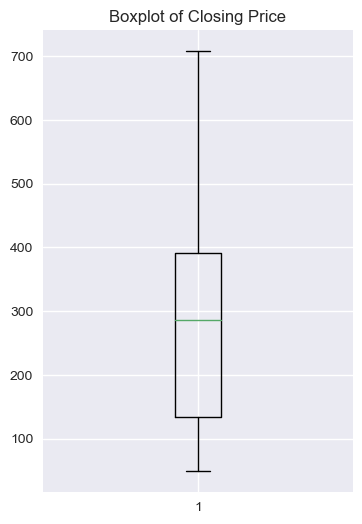

In [45]:
# Visualize Closing Price
plt.figure(figsize=(4,6))
plt.boxplot(df_new['Close'].dropna())
plt.title('Boxplot of Closing Price', size=12)
plt.show()

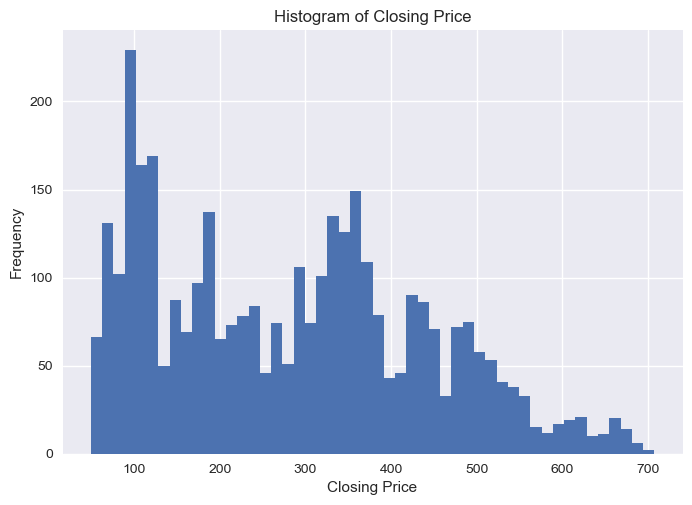

In [46]:
# Visualize Closing Price
plt.hist(df_new['Close'].dropna(), bins=50)
plt.xlabel('Closing Price')
plt.ylabel('Frequency') 
plt.title('Histogram of Closing Price')
plt.grid(True)

plt.show()

In [47]:
df_new['Close'].describe()

count    3537.000000
mean      284.127914
std       156.702311
min        49.130000
25%       133.700000
50%       285.770000
75%       391.820000
max       707.610000
Name: Close, dtype: float64

In [48]:
def print_outliers_analysis(df_new):
    # calculate IQR
    Q1 = df_new.quantile(0.25)
    Q3 = df_new.quantile(0.75)
    IQR = Q3 - Q1
    
    # identify outliers
    threshold = 1.5
    outliers = df_new[(df_new < Q1 - threshold * IQR) | (df_new > Q3 + threshold * IQR)]
    num_outliers = outliers.count()
    total_count = len(df_new)
    perc_outliers = (num_outliers/total_count)*100
    print("Min. value: {}".format(df_new.min()))
    print("Q1 value: {}".format(Q1))
    print("Q2 value: {}".format(df_new.median()))
    print("Q3 value: {}".format(Q3))
    print("Max. value: {}".format(df_new.max()))
    print("Outliers considered as < {:.2f} and > {:.2f}".format(Q1 - threshold * IQR, Q3 + threshold * IQR))
    print("% of Outliers: {:.2f}%".format(perc_outliers))

In [49]:
# calculate IQR
print_outliers_analysis(df_new['Close'])

Min. value: 49.13
Q1 value: 133.7
Q2 value: 285.77
Q3 value: 391.82
Max. value: 707.61
Outliers considered as < -253.48 and > 779.00
% of Outliers: 0.00%


## 2. Exploratory Data Analysis

### 2.1 Closing Price from 2010 till Today by Date

Text(0, 0.5, 'Closing Price')

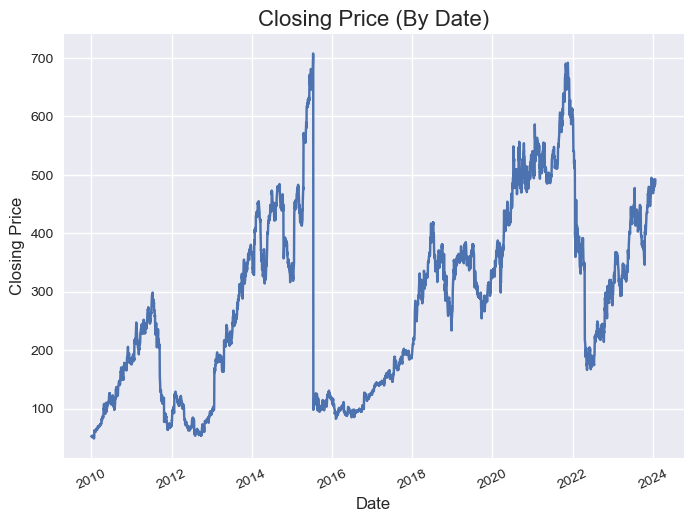

In [50]:
# create the time series plot 
sns.lineplot(x = "Date", y = "Close", 
             data = df_new) 
  
plt.xticks(rotation = 25)
plt.title('Closing Price (By Date)', size=16)
plt.xlabel('Date', size=12)
plt.ylabel('Closing Price', size=12)

### 2.2 Closing Price from 2010 till Today by Year

Text(0, 0.5, 'Closing Price')

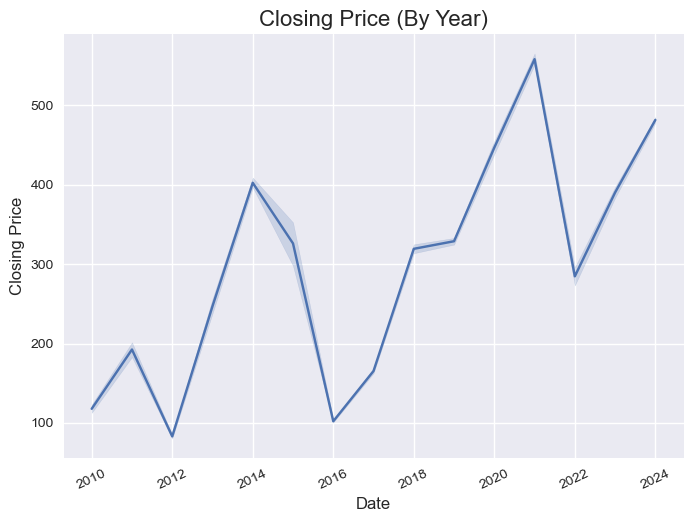

In [51]:
# create the time series plot 
sns.lineplot(x = "Year", y = "Close", 
             data = df_new) 
  
plt.xticks(rotation = 25)
plt.title('Closing Price (By Year)', size=16)
plt.xlabel('Date', size=12)
plt.ylabel('Closing Price', size=12)

### 2.3 Box Plot of Closing Price By Year

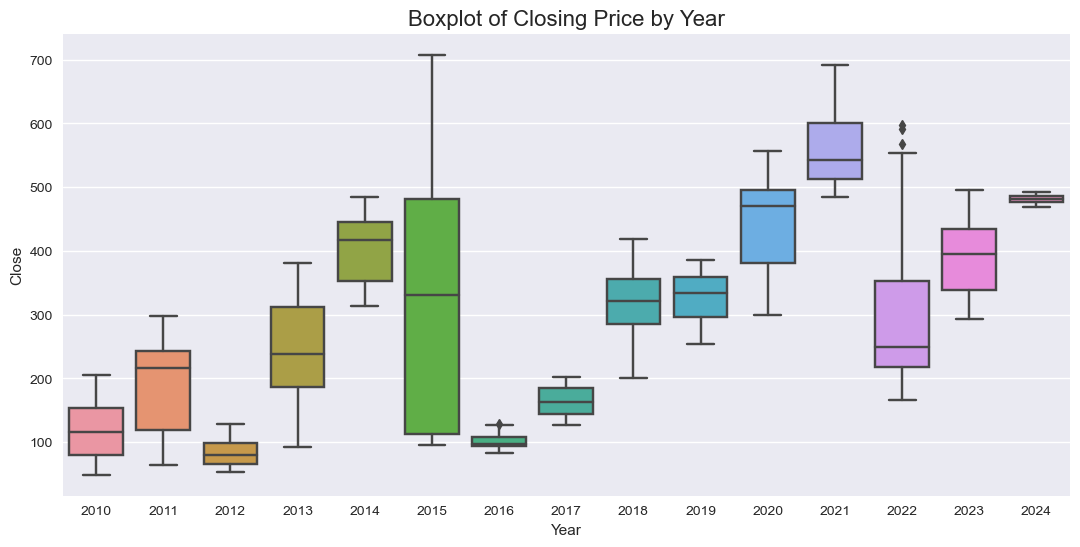

In [52]:
#Length of service distribution among different department 
plt.figure(figsize=(13,6))
sns.boxplot(y='Close', x='Year', data=df_new) 
plt.ticklabel_format(style='plain', axis='y')
plt.title('Boxplot of Closing Price by Year', size=16)
plt.show()

### 2.4 Trade Volume (By Date)

Text(0, 0.5, 'Trade Volume')

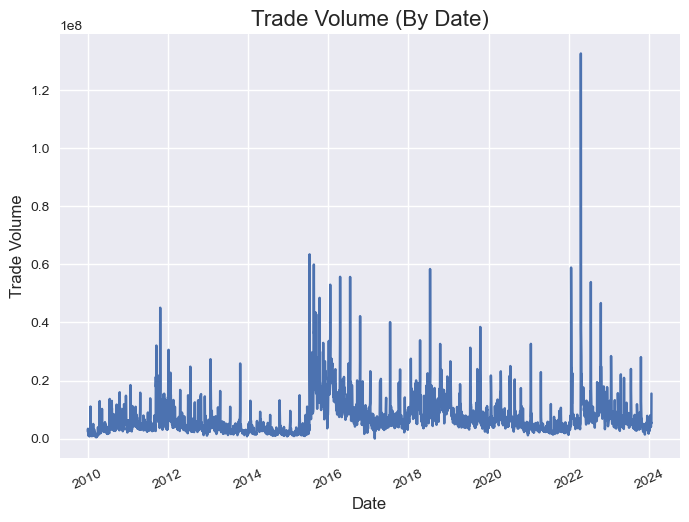

In [53]:
# create the time series plot 
sns.lineplot(x = "Date", y = "Volume", 
             data = df_new) 
  
plt.xticks(rotation = 25)
plt.title('Trade Volume (By Date)', size=16)
plt.xlabel('Date', size=12)
plt.ylabel('Trade Volume', size=12)

### 2.5 Trade Volume (By Year)

Text(0, 0.5, 'Trade Volume')

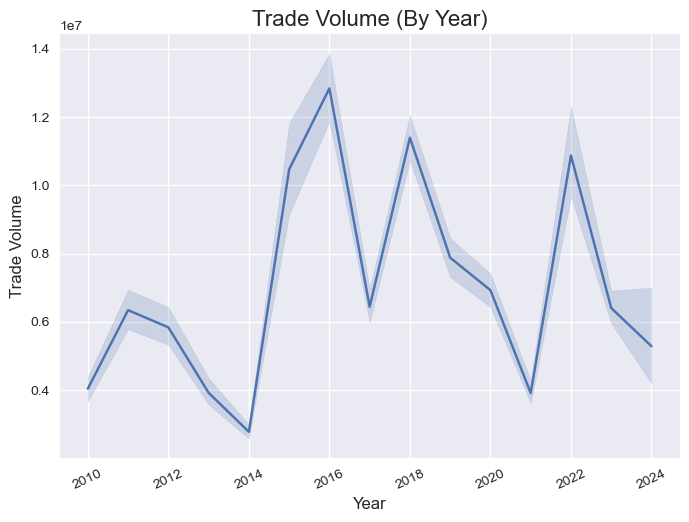

In [54]:
# create the time series plot 
sns.lineplot(x = "Year", y = "Volume", 
             data = df_new) 
  
plt.xticks(rotation = 25)
plt.title('Trade Volume (By Year)', size=16)
plt.xlabel('Year', size=12)
plt.ylabel('Trade Volume', size=12)

### 2.6 Box Plot of Trade Volume By Year

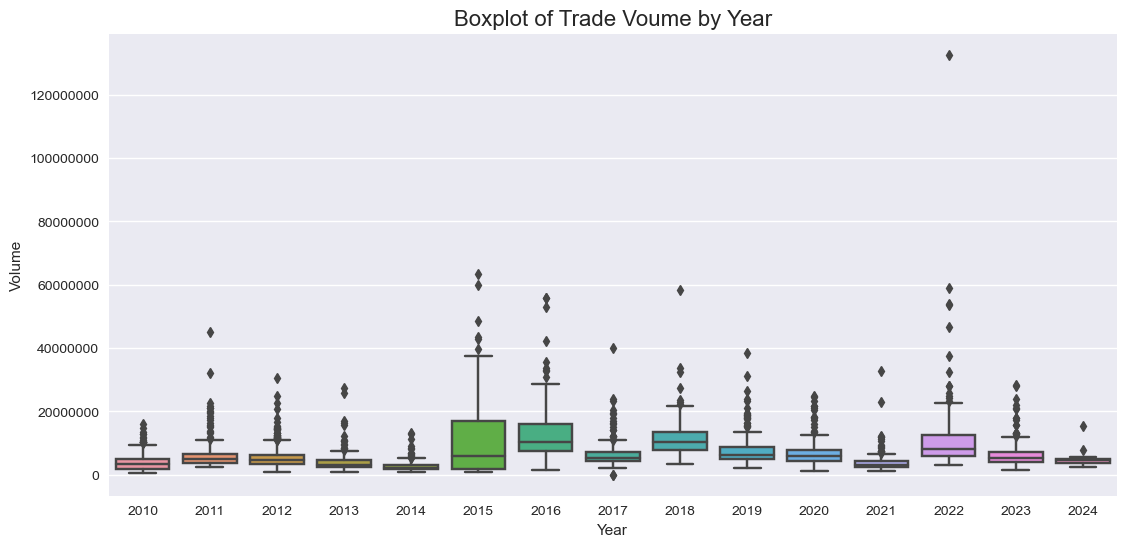

In [55]:
#Length of service distribution among different department 
plt.figure(figsize=(13,6))
sns.boxplot(y='Volume', x='Year', data=df_new) 
plt.ticklabel_format(style='plain', axis='y')
plt.title('Boxplot of Trade Voume by Year', size=16)
plt.show()

### 2.7 Plot of Opening vs Closing Price

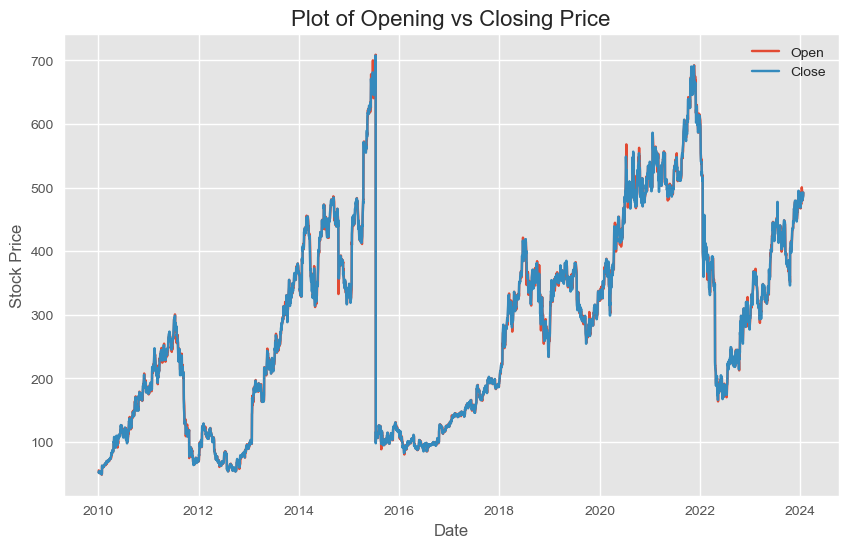

In [56]:
# Create a figure and subplot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6)) 
 
# Plot
sns.lineplot(x=df_new['Date'], y='Open', data=df_new, ax = ax,
            markers="o", label="Open")
sns.lineplot(x=df_new['Date'], y='Close', data=df_new, ax = ax,
            markers="^", label="Close")

#Set titles
ax.set_title('Plot of Opening vs Closing Price', fontsize = 16)
ax.set_ylabel('Stock Price', fontsize = 12)
ax.set_xlabel('Date', fontsize = 12)
ax.legend(loc='upper left')


# Display the plot
ax.legend()
plt.show()

### 2.8 Changes in Stock Price

In [57]:
#????

### 2.9 Correlation Matrix


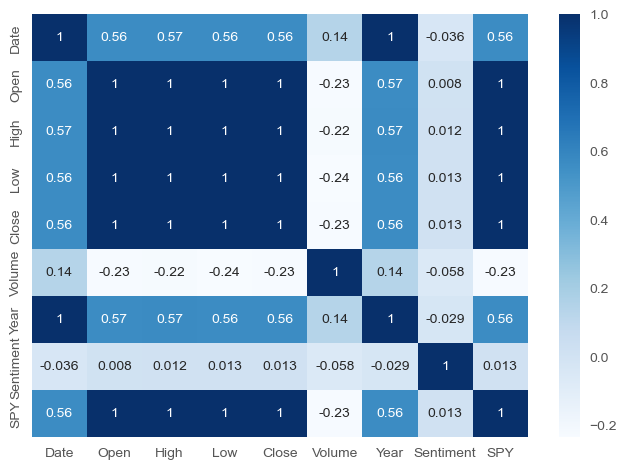

In [58]:
# Compute the correlation matrix
corr = df_new.corr()

# Draw heatmap
sns.heatmap(corr, cmap="Blues", annot=True)

plt.show()

In [59]:
df_new.to_csv("cleaned_dataset.csv")